In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Анализируем данные по клиентам немецкого банка: https://www.kaggle.com/uciml/german-credit

In [2]:
data = pd.read_csv('german_credit_data.csv', index_col='Unnamed: 0')

In [3]:
initial_columns = data.columns

In [4]:
data.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car

In [5]:
data.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

Column "Age" distribution


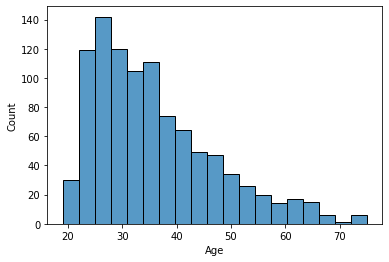

Column "Sex" distribution


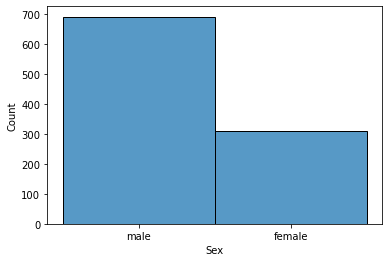

Column "Job" distribution


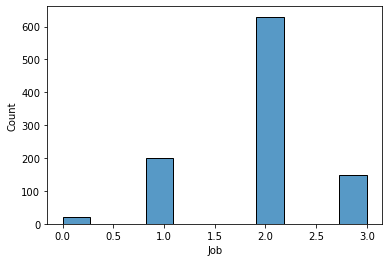

Column "Housing" distribution


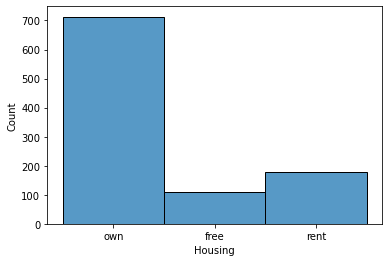

Column "Saving accounts" distribution


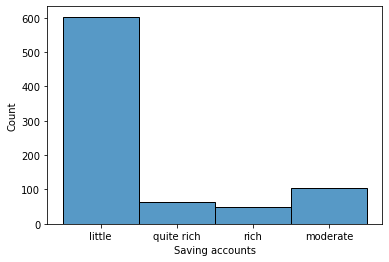

Column "Checking account" distribution


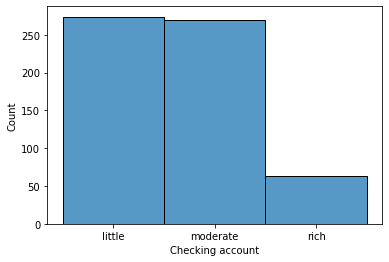

Column "Credit amount" distribution


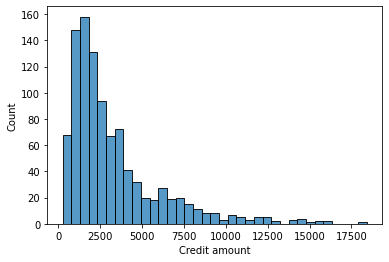

Column "Duration" distribution


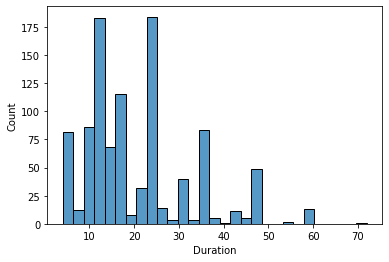

Column "Purpose" distribution


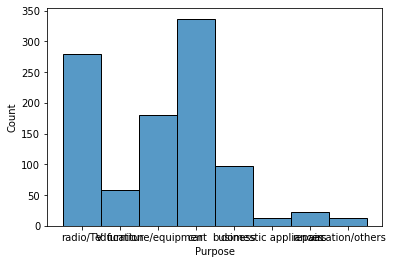

In [6]:
for col in data.columns.tolist():
    print(f'Column "{col}" distribution');
    hist = sns.histplot(data=data[col], label=f'Column "{col}" distribution');
    plt.show();

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


Заполним пропуски, предполагая NaN нулевыми значениями.

In [8]:
coded_data = data.copy()
coded_data = coded_data.fillna(0)
coded_data.head(10)

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own               0           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little                0           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   
5   35    male    1    free               0                0           9055   
6   53    male    2     own      quite rich                0           2835   
7   35    male    3    rent          little         moderate           6948   
8   61    male    1     own            rich                0           3059   
9   28    male    3     own          little         moderate           5234   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car  
5        36            education  
6        24  furniture/equipment  
7        36                  car  
8        12             radio/TV  
9        30                  car

Закодируем категориальные признаки. Для некоторых можно воспользоваться значимостью прорядка признаков.

In [9]:
from sklearn.preprocessing import OrdinalEncoder
col = ['Saving accounts', 'Checking account', 'Housing']  #['Sex', 'Housing', 'Saving accounts', 'Checking account','Purpose']:
enc = OrdinalEncoder(categories=[[0, 'little', 'moderate', 'quite rich', 'rich'],
                                 [0, 'little', 'moderate', 'rich'], ['free', 'rent', 'own']])
enc.set_params()
coded_data[col]= enc.fit_transform(coded_data[col])

coded_data.head()

Age     Sex  Job  Housing  Saving accounts  Checking account  \
0   67    male    2      2.0              0.0               1.0   
1   22  female    2      2.0              1.0               2.0   
2   49    male    1      2.0              1.0               0.0   
3   45    male    2      0.0              1.0               1.0   
4   53    male    2      0.0              1.0               1.0   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car

In [10]:
from sklearn.preprocessing import OrdinalEncoder
col = ['Sex', 'Purpose']
enc = OrdinalEncoder()
enc.set_params()
coded_data[col]= enc.fit_transform(coded_data[col])

coded_data.head()

Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67  1.0    2      2.0              0.0               1.0           1169   
1   22  0.0    2      2.0              1.0               2.0           5951   
2   49  1.0    1      2.0              1.0               0.0           2096   
3   45  1.0    2      0.0              1.0               1.0           7882   
4   53  1.0    2      0.0              1.0               1.0           4870   

   Duration  Purpose  
0         6      5.0  
1        48      5.0  
2        12      3.0  
3        42      4.0  
4        24      1.0

In [11]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['business', 'car', 'domestic appliances', 'education',
        'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],
       dtype=object)]

Масштабирование при кластеризации важно, потому что при построении кластеров расчитывается расстояние между точками.
Поэтому необходимо, чтобы координаты были сопоставимыми.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(coded_data)
scaled_data = pd.DataFrame(scaler.transform(coded_data), columns = coded_data.columns)

In [13]:
scaled_data.describe()

Age           Sex           Job       Housing  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   3.597123e-17 -4.418688e-17  1.167400e-16 -1.093570e-16   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -1.455261e+00 -1.491914e+00 -2.914492e+00 -2.379476e+00   
25%   -7.516417e-01 -1.491914e+00  1.469492e-01 -8.969363e-01   
50%   -2.239269e-01  6.702801e-01  1.469492e-01  5.856030e-01   
75%    5.676451e-01  6.702801e-01  1.469492e-01  5.856030e-01   
max    3.470076e+00  6.702801e-01  1.677670e+00  5.856030e-01   

       Saving accounts  Checking account  Credit amount      Duration  \
count     1.000000e+03      1.000000e+03   1.000000e+03  1.000000e+03   
mean     -3.586020e-16      2.591261e-16   7.771561e-17  1.332268e-16   
std       1.000500e+00      1.000500e+00   1.000500e+00  1.000500e+00   
min      -1.231393e+00     -1.046463e+00  -1.070865e+00 -1.402415e+00   
25%      -1.966090e-01     -1.046463e+00  -6.754833e-01 -7.386675e-01   
50%      -1.966090e-01     -1.045417e-03  -3.373443e-01 -2.408572e-01   
75%      -1.966090e-01      1.044372e+00   2.484620e-01  2.569531e-01   
max       2.907744e+00      2.089789e+00   5.370789e+00  4.239436e+00   

            Purpose  
count  1.000000e+03  
mean  -2.797762e-16  
std    1.000500e+00  
min   -1.455632e+00  
25%   -9.498528e-01  
50%    6.170503e-02  
75%    1.073263e+00  
max    2.084821e+00

In [14]:
scaled_data.head()

Age       Sex       Job   Housing  Saving accounts  Checking account  \
0  2.766456  0.670280  0.146949  0.585603        -1.231393         -0.001045   
1 -1.191404 -1.491914  0.146949  0.585603        -0.196609          1.044372   
2  1.183312  0.670280 -1.383771  0.585603        -0.196609         -1.046463   
3  0.831502  0.670280  0.146949 -2.379476        -0.196609         -0.001045   
4  1.535122  0.670280  0.146949 -2.379476        -0.196609         -0.001045   

   Credit amount  Duration   Purpose  
0      -0.745131 -1.236478  1.073263  
1       0.949817  2.248194  1.073263  
2      -0.416562 -0.738668  0.061705  
3       1.634247  1.750384  0.567484  
4       0.566664  0.256953 -0.949853

# Уменьшение размерности для представления результатов

Попробуем разные методы уменьшения размерности для представления результатов кластеризации. Принимая во внимание, что разные методы сохраняют структуры разных уровней, лучше обобщить результаты работы нескольких методов.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

In [17]:
import umap
umap = umap.UMAP(n_components=2, random_state=42, n_neighbors=50, min_dist=0.3, metric='euclidean')
umap_data = umap.fit_transform(scaled_data)

2023-06-08 04:19:01.708726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 04:19:02.447786: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/natasha/anaconda3/lib/:/home/natasha/anaconda3/envs/TF/lib/python3.9/site-packages/nvidia/cudnn/lib
2023-06-08 04:19:02.447855: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/natasha/anaconda

In [18]:
import matplotlib.pyplot as plt

def plot_clusters(reduced_data, labels, title):    
    fig, ax = plt.subplots(figsize=(7,7))  #, subplot_kw={"projection": "3d"})
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='turbo')
    plt.title(title)
    plt.show()    

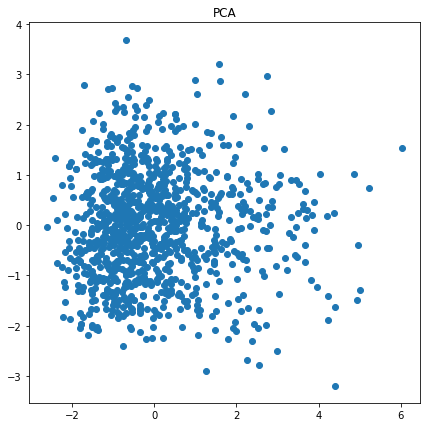

In [19]:
plot_clusters(pca_data, None, 'PCA')

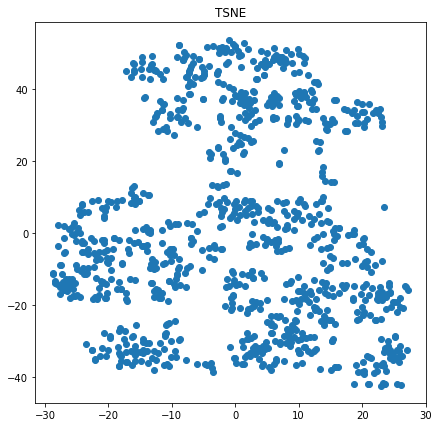

In [20]:
plot_clusters(tsne_data, None, 'TSNE')

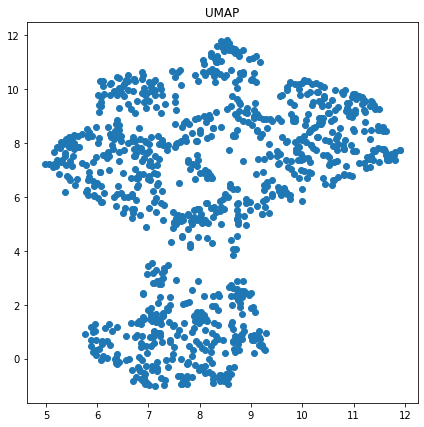

In [21]:
plot_clusters(umap_data, None, 'UMAP')

In [22]:
import matplotlib.pyplot as plt

def compare_clusters(title, labels_1=None, 
                     labels_2=None, labels_3=None,
                     reduced_data_1=pca_data, reduced_data_2=tsne_data, reduced_data_3=umap_data,
                     titles_for_data=None):   
    if labels_2 is None:
        labels_2 = labels_1
    if labels_3 is None:
        labels_3 = labels_1
    if titles_for_data is None:
        titles_for_data = ['PCA', 'tSNE', 'UMAP']
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,10))
    axes[0].scatter(reduced_data_1[:, 0], reduced_data_1[:, 1], c=labels_1, cmap='turbo')
    axes[1].scatter(reduced_data_2[:, 0], reduced_data_2[:, 1], c=labels_2, cmap='turbo')
    axes[2].scatter(reduced_data_3[:, 0], reduced_data_3[:, 1], c=labels_3, cmap='turbo')
    for index in range(3):
        axes[index].set_title(titles_for_data[index])
    fig.suptitle(title)
    plt.show()    

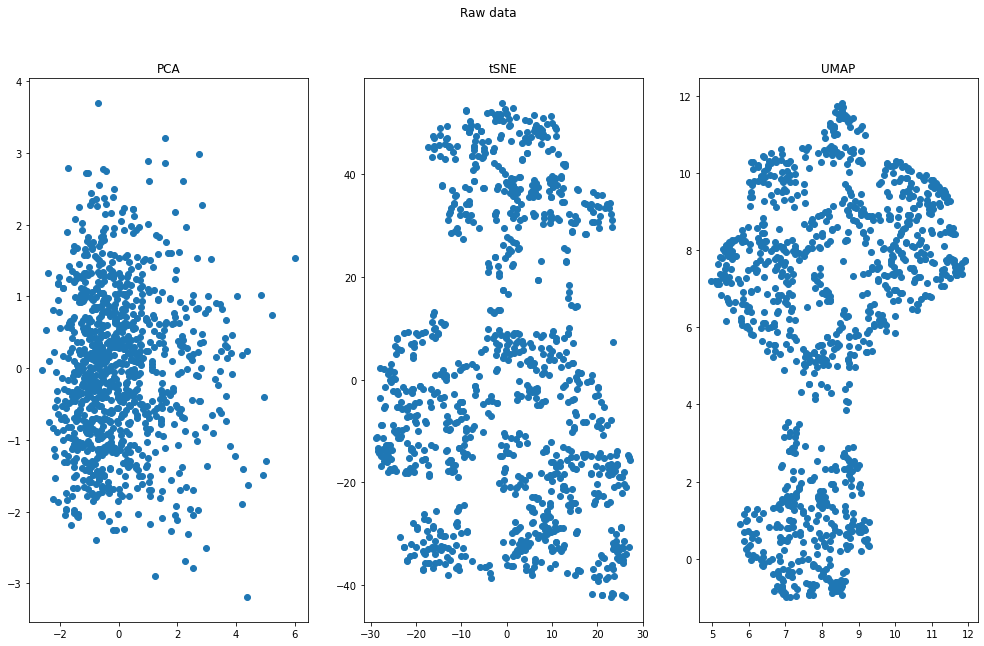

In [23]:
compare_clusters('Raw data')

# Кластеризация

In [24]:
import matplotlib.pyplot as plt

def optim_clust_num(model, data, interval):
    inertia = []
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 4)
    for i in range(1, interval+1):
        model.n_clusters = i
        model.fit(scaled_data)
        inertia_i = model.inertia_
        inertia.append(inertia_i)
    ax1.set_title("The inertia plot")
    ax1.set_xlabel("n_clusters")
    ax1.set_ylabel("inertia")
    ax1.plot(range(1, interval+1), inertia, marker='o');
    
    delta_inertia = []
    for i in range(1,interval-1):
        delta_inertia_i = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
        delta_inertia.append(delta_inertia_i)
    ax2.set_title("The delta of inertia plot")
    ax2.set_xlabel("n_clusters")
    ax2.set_ylabel("delta_inertia")
    ax2.plot(range(2,interval), delta_inertia, marker='o');
    
    
def silhouette_sc_clusters_list(model, data, interval):
    
    from sklearn.metrics import silhouette_score
    silhouette_sc = []
    plt.figure(figsize=(10, 4))
    clusterer = model
    
    list_n_clusters = list(range(2, interval + 1))
    for n_clusters in list_n_clusters:
        clusterer.n_clusters = n_clusters
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_sc.append(silhouette_avg)

    plt.gca().set(title="The silhouette_score plot",
            xlabel="n_clusters",
            ylabel="silhouette_score")
    plt.plot(range(2,interval+1), silhouette_sc, marker='o');
    plt.legend()
    plt.show()

In [25]:
def silhouette_for_clusters(model, data, list_n_clusters):
    
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    
    print('For model', model)
    for n_clusters in list_n_clusters:

        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value.
        clusterer = model
        clusterer.n_clusters = n_clusters
        cluster_labels = clusterer.fit_predict(data)

        # Compute the average silhouette_score.
        silhouette_avg = silhouette_score(data, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        y_lower = 10
        
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        for i in range(n_clusters):           
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [26]:
def silhouette_drowing(data, cluster_labels):
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
        
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    for i in range(len(cluster_labels)):           
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / len(cluster_labels))
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

          
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            
        y_lower = y_upper + 10  # 10 for the 0 samples

        plt.set_title("The silhouette plot for the various clusters.")
        plt.set_xlabel("The silhouette coefficient values")
        plt.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")

        plt.set_yticks([])  # Clear the yaxis labels / ticks
        plt.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

# KMeans 

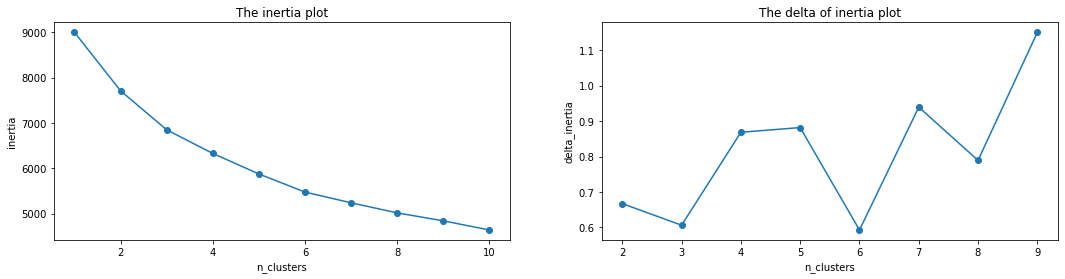

In [27]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(random_state=42)
optim_clust_num(kmeans_model, scaled_data, 10)

Выраженного 'локтя' на графике не наблюдается.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


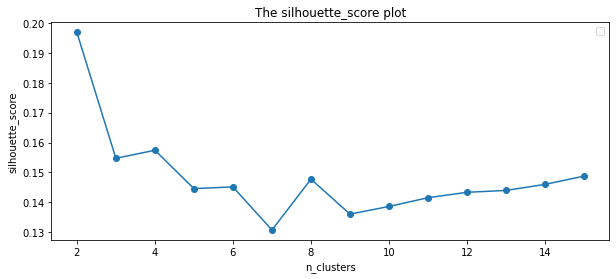

In [28]:
kmeans_model = KMeans(random_state=42)
silhouette_sc_clusters_list(kmeans_model, scaled_data, 15)

По результатам графика силуэтного коэффициента есть интересные точки 4, 5 и 8 кластеров.

For model KMeans(random_state=42)
For n_clusters = 4 The average silhouette_score is : 0.1574248485227439
For n_clusters = 5 The average silhouette_score is : 0.1445633884656776
For n_clusters = 8 The average silhouette_score is : 0.14773528152239962


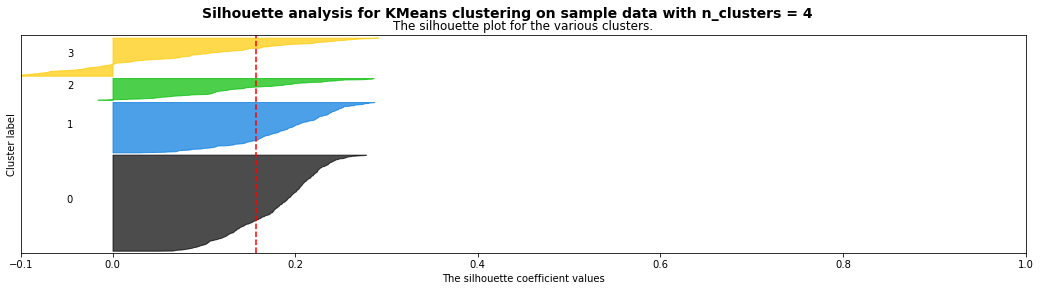

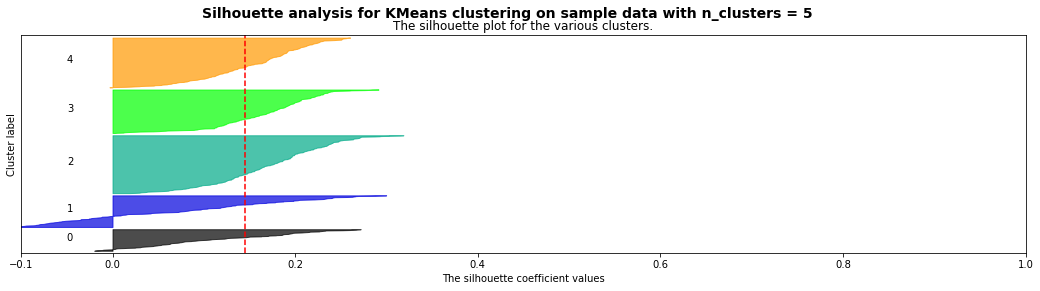

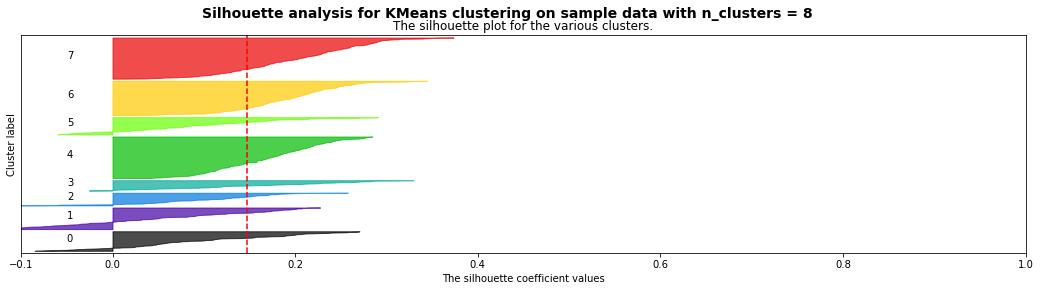

In [29]:
kmeans_model = KMeans(random_state=42)
silhouette_for_clusters(kmeans_model, scaled_data, [4, 5, 8])

# Для этой модели оптимально выбрать 4 или 5 кластеров. Достаточно высокое значение силуэтного коэффициента и только у пары кластеров есть отрицательные значения по этому показателю.

In [30]:
kmeans_model = KMeans(n_clusters=4,random_state=15).fit(scaled_data)
kmeans_labels_4 = kmeans_model.labels_

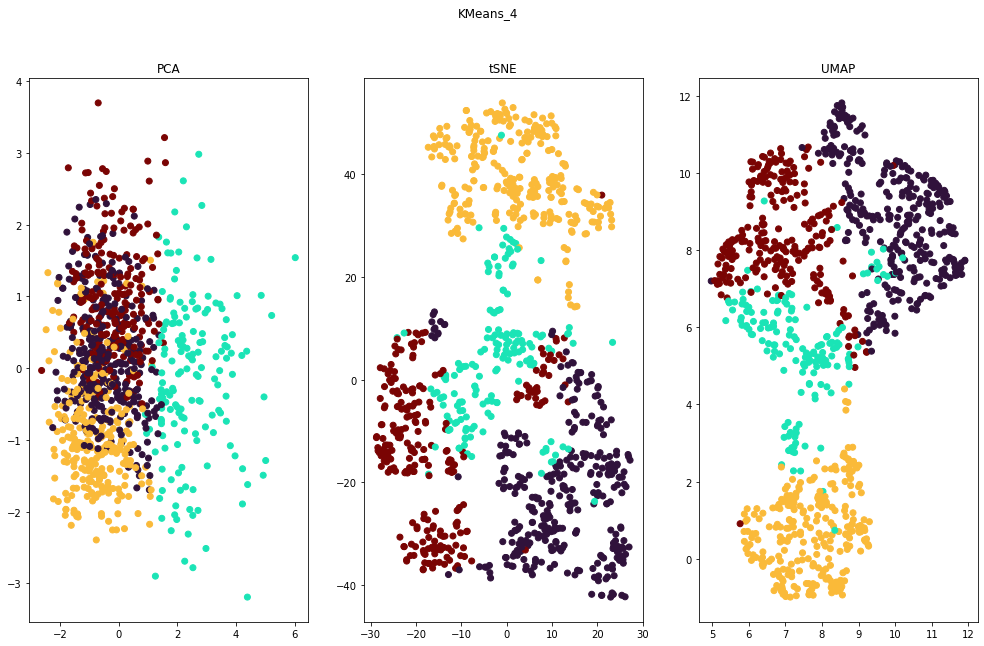

In [31]:
compare_clusters('KMeans_4', kmeans_labels_4)

In [32]:
kmeans_model = KMeans(n_clusters=5,random_state=15).fit(scaled_data)
kmeans_labels_5 = kmeans_model.labels_

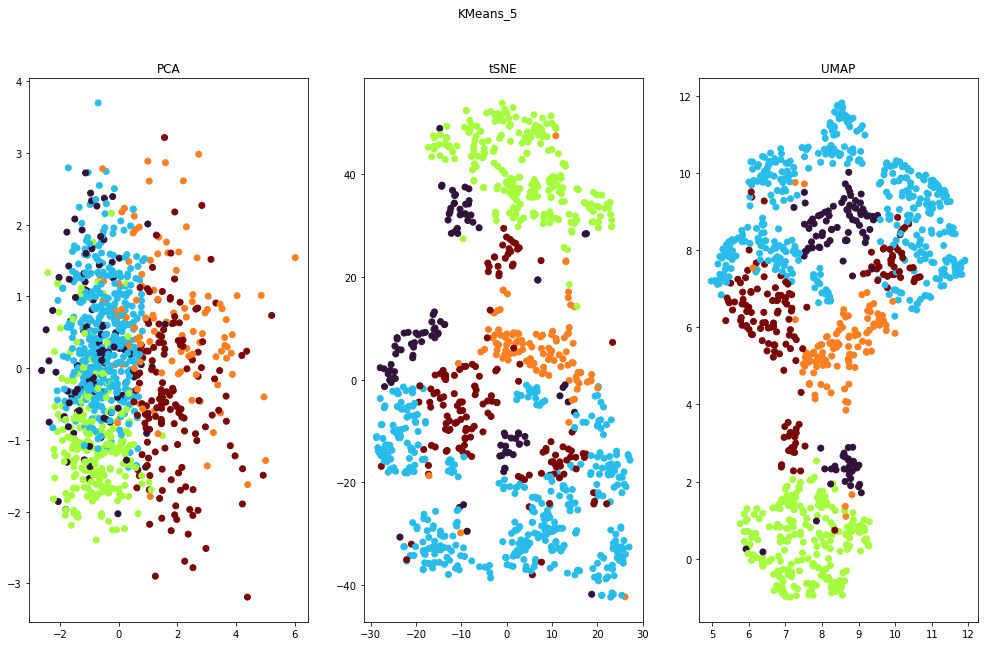

In [33]:
compare_clusters('KMeans_5', kmeans_labels_5)

In [34]:
kmeans_model = KMeans(n_clusters=8,random_state=15).fit(scaled_data)
kmeans_labels_8 = kmeans_model.labels_

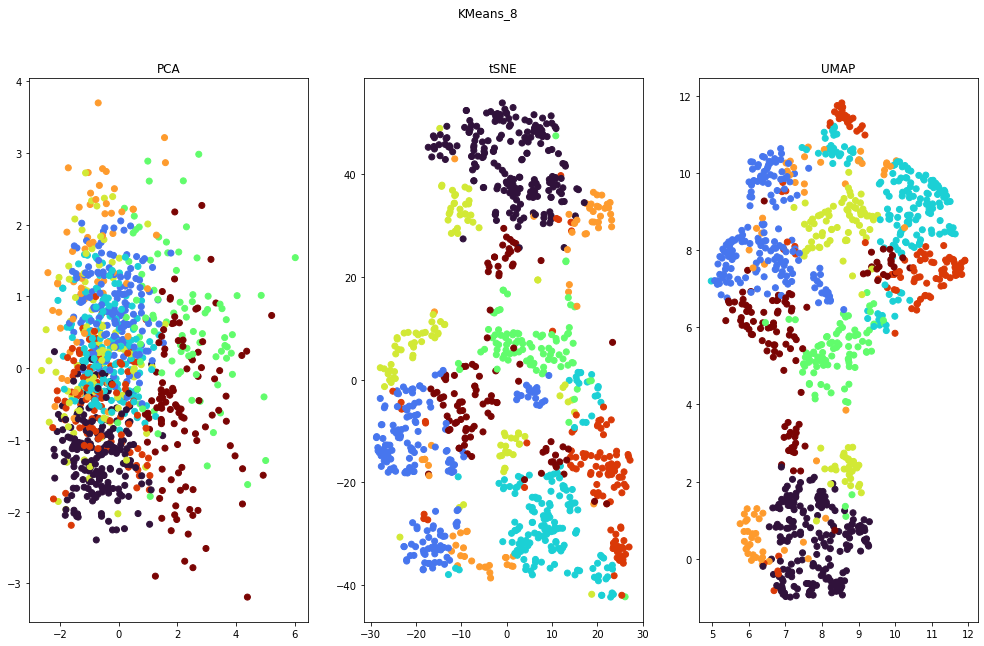

In [35]:
compare_clusters('KMeans_8', kmeans_labels_8)

Для 8 кластеров, они получаются мелкими. А 4 и 5 выглядят интересно.

# AgglomerativeClustering

In [36]:
from sklearn.cluster import AgglomerativeClustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


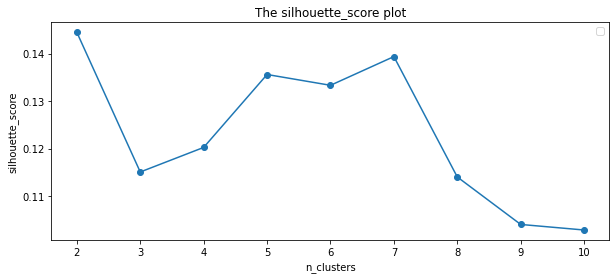

In [37]:
agglom_model = AgglomerativeClustering()
silhouette_sc_clusters_list(agglom_model, scaled_data, 10)

По графику интересными кажутся точки 5 и 7 кластеров.

For model AgglomerativeClustering()
For n_clusters = 4 The average silhouette_score is : 0.1202603740033843
For n_clusters = 5 The average silhouette_score is : 0.13562033522564898
For n_clusters = 7 The average silhouette_score is : 0.1393923659044597


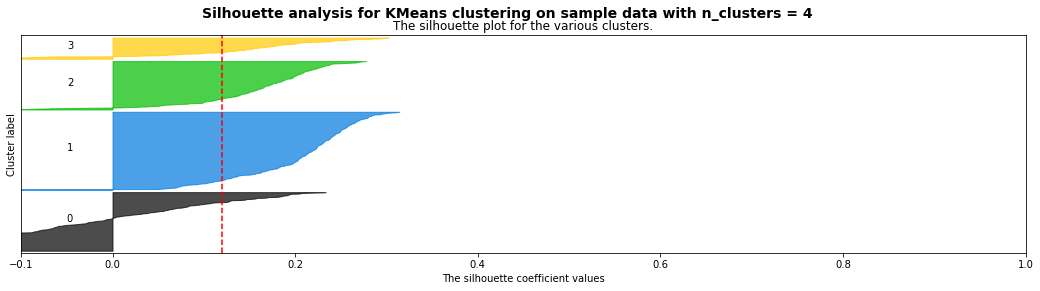

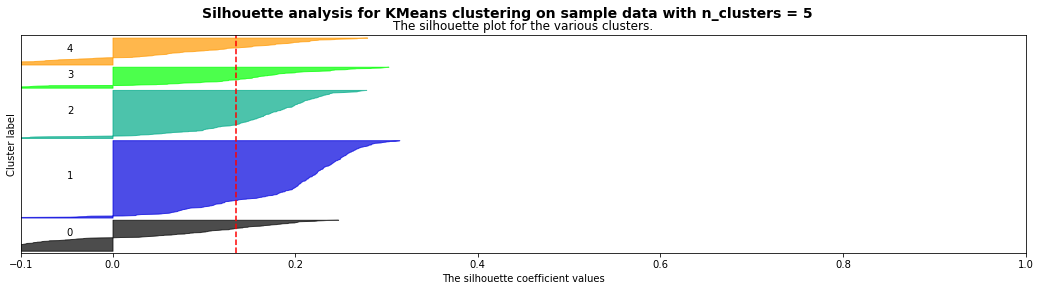

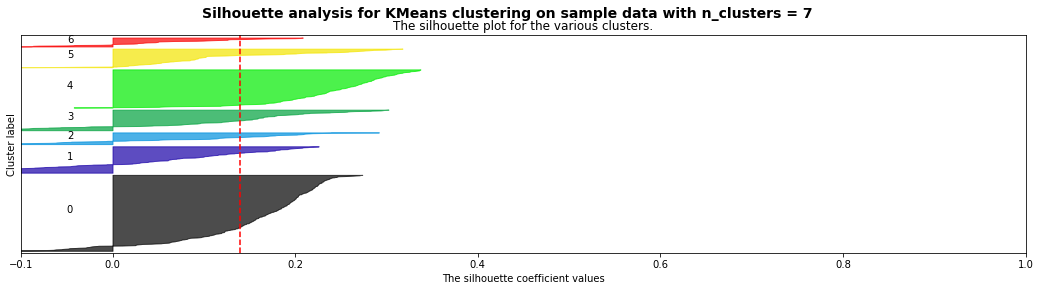

In [38]:
agglom_model = AgglomerativeClustering()
silhouette_for_clusters(agglom_model, scaled_data, [4, 5, 7])

Оптимальное значение количества кластеров для агломеративного кластеризатора получилось 5 или 7. И данный метод дал ниже значения силуэтного коэффициента, чем KMeans.

In [39]:
agglom_model = AgglomerativeClustering(n_clusters=4).fit(scaled_data)
agglom_labels_4 = agglom_model.labels_

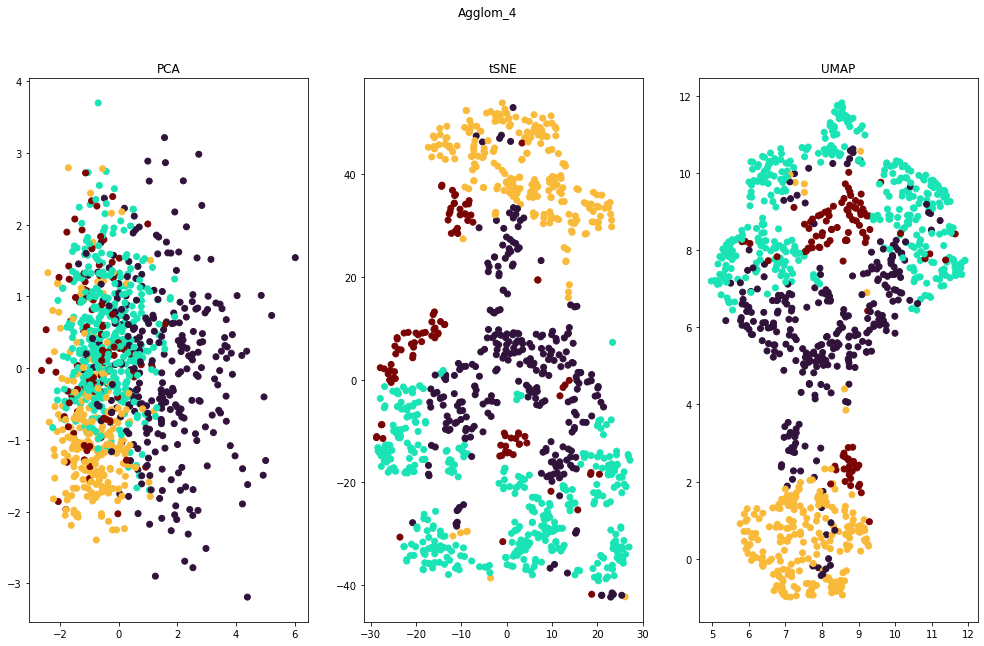

In [40]:
compare_clusters('Agglom_4', agglom_labels_4)

In [41]:
agglom_model = AgglomerativeClustering(n_clusters=5).fit(scaled_data)
agglom_labels_5 = agglom_model.labels_

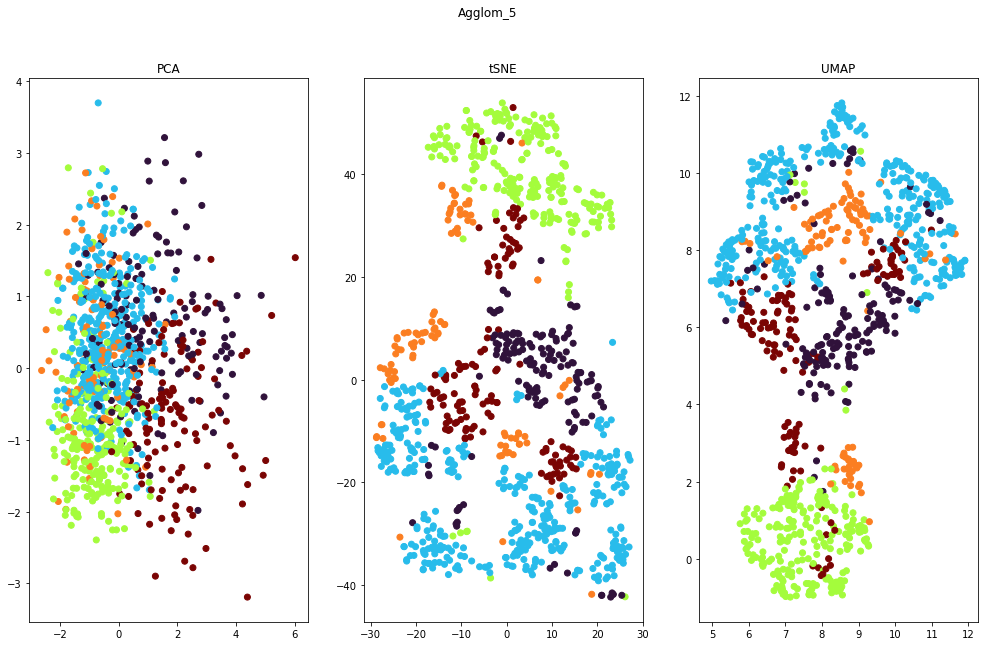

In [42]:
compare_clusters('Agglom_5', agglom_labels_5)

In [43]:
agglom_model = AgglomerativeClustering(n_clusters=7).fit(scaled_data)
agglom_labels_7 = agglom_model.labels_

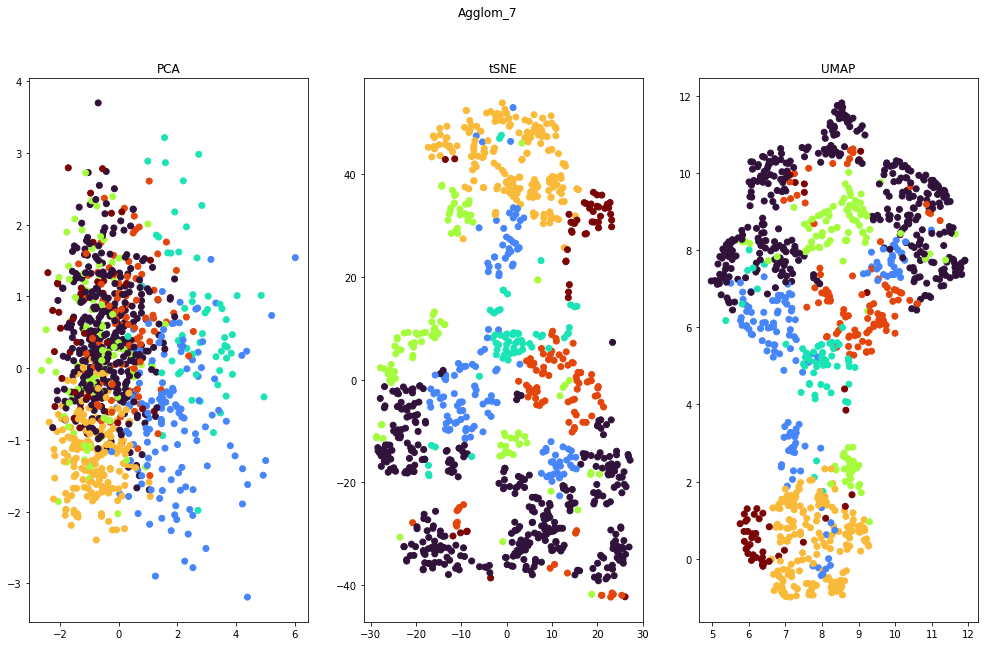

In [44]:
compare_clusters('Agglom_7', agglom_labels_7)

Видно, что для данной выборки кластеров не следует делать больше 6.

# Сравним результаты для AgglomerativeClustering и KMeans

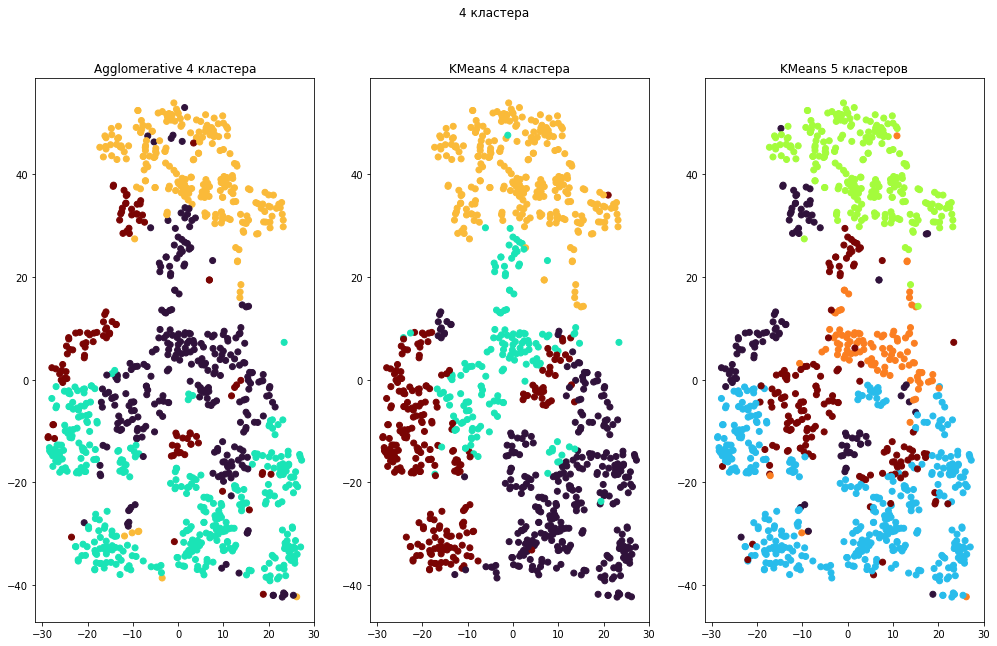

In [45]:
compare_clusters('4 кластера', labels_1=agglom_labels_4, labels_2=kmeans_labels_4, labels_3=kmeans_labels_5,
                 reduced_data_1=tsne_data, reduced_data_2=tsne_data, reduced_data_3=tsne_data,
                 titles_for_data=['Agglomerative 4 кластера', 'KMeans 4 кластера', 'KMeans 5 кластеров'])

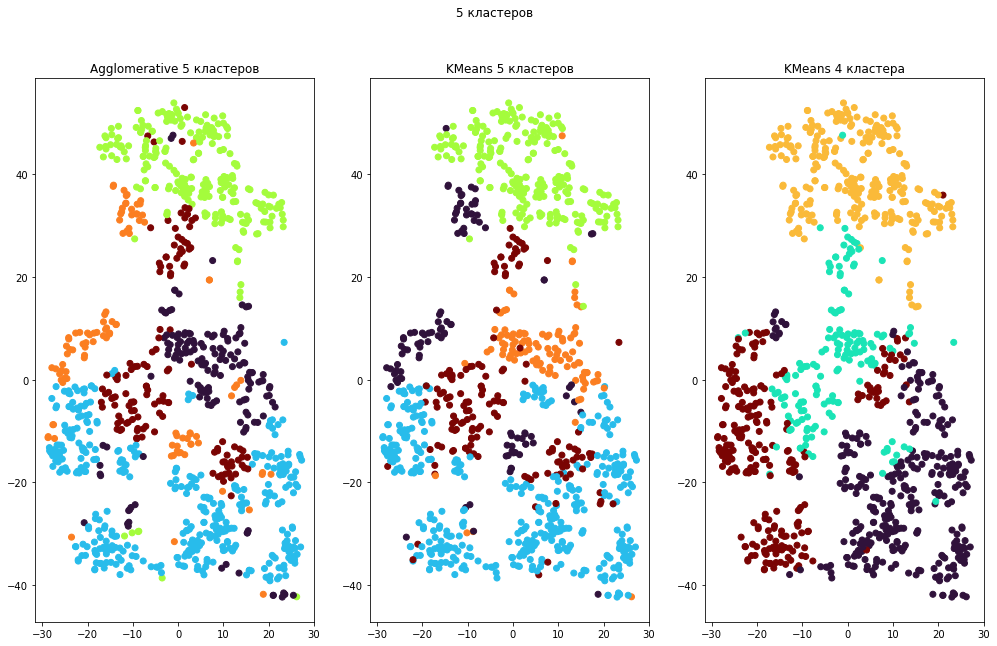

In [46]:
compare_clusters('5 кластеров', labels_1=agglom_labels_5, labels_2=kmeans_labels_5, labels_3=kmeans_labels_4,
                 reduced_data_1=tsne_data, reduced_data_2=tsne_data, reduced_data_3=tsne_data,
                 titles_for_data=['Agglomerative 5 кластеров', 'KMeans 5 кластеров', 'KMeans 4 кластера'])

Видно, что при 5 кластерах мы получаем примерно похожую картину для 2 методов. Посмотрим подробнее полученные кластеры на разметке KMeans.

In [47]:
def plot_clasters(data, label_set):
    hist = sns.histplot(data=data[label_set], label=f'Column "{label_set}" distribution');
    plt.show();

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_values(data, label_set, columns):
    plot_clasters(data, label_set)
    values = np.unique(data[label_set]) 
    fig, axes = plt.subplots(figsize=(20,20), nrows=len(columns), ncols=len(values))
    for col_number, feature in enumerate(columns):        
        for index, value in enumerate(values):
            sub_set = data[data[label_set] == value]
            axes[col_number][index].hist(sub_set[feature], density=False,
                                         rwidth=0.8, bins=20)
            axes[col_number][index].set_title(str(feature)+str(value))
    plt.tight_layout()
    plt.show()

In [49]:
df_labels = pd.DataFrame(kmeans_labels_5, index=scaled_data.index, columns=['KMeans_5'])
labeled_data = pd.concat([coded_data, df_labels], axis=1)

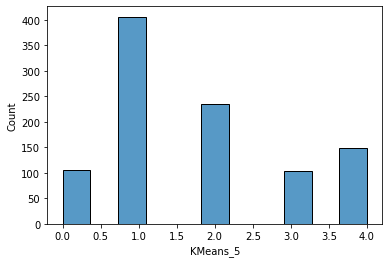

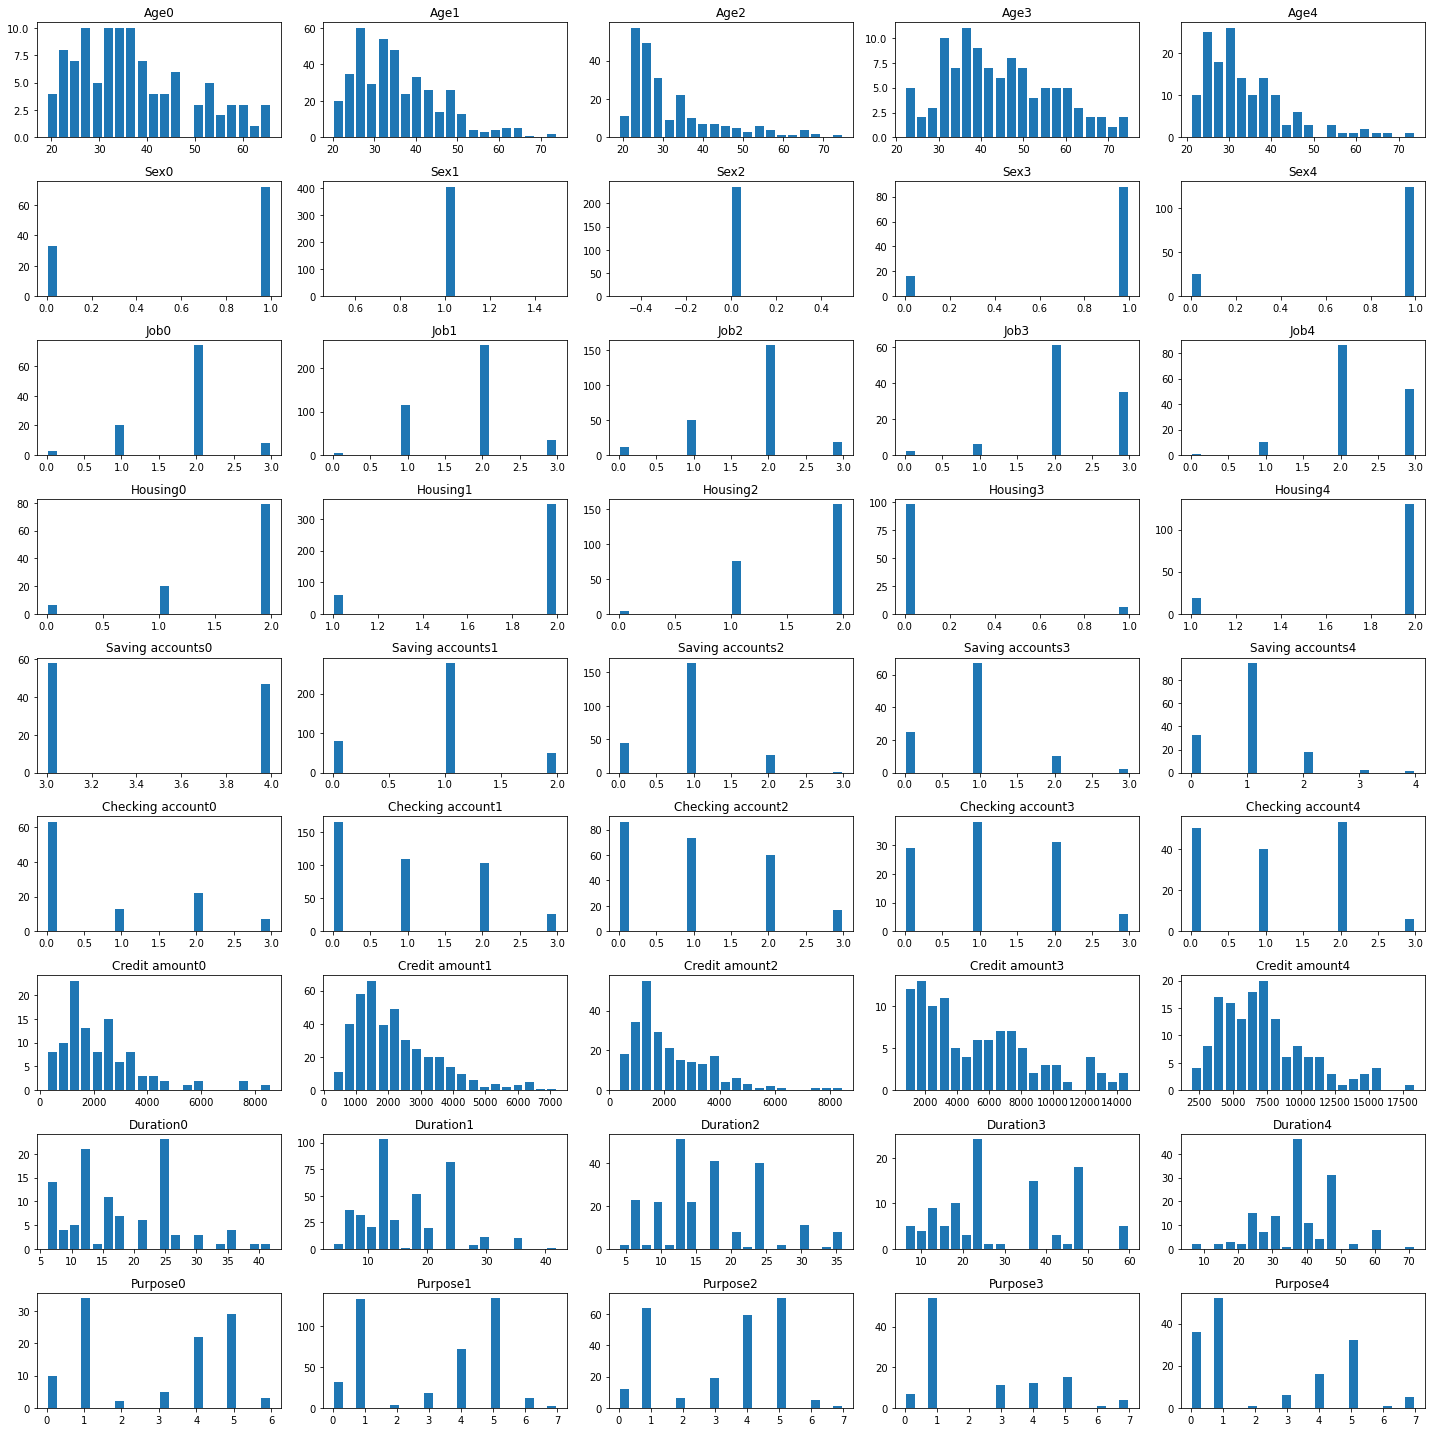

In [50]:
plot_values(labeled_data, 'KMeans_5', initial_columns)

# Кластеры:
    1 В этом кластере много больших накоплений, более равномерное распределение по возрасту. Назовем кластер "Богатые". У большей части есть собственное жилье. Среди трат преобладают траты на машины, электронику (radio/TV) и обстановку дома (furniture/equipment).
    
    2 Следующий кластер самый многочисленный. Название кластера "Активные мужчины". Это мужчины от молодых до среднего возраста. У них также почти у всех есть свое жилье. У них приоритеты похожи на предыдущую категорию, но траты на автомобили немного ниже, чем у "Богачей".
    
    3 Третий кластер выделяется тем, что состоит только из женщин. Они достаточно молодые и квалифицированные. Как и "активные мужчины", берут кредит на машину, электронику или мебель, однако доля на обстановку выше, чем у мужчин. По аналогии с предыдущим, я бы назвала этот кластер "Активные женщины".
    
    4 Следующий кластер смешанный по полу и его особенность в преобладании бесплатного жилья. Полагаю, это может быть социальное жилье. Принимая во внимание широкий возрастной диапазон и значительную долю высококвалифицированных людей, можно предположить, что значительную часть группы составляют пенсионеры. Подходящее название для кластера "Пенсионеры". Они берут кредиты на более крупный суммы и на более длительный срок, чем первые 3 категории. Интересно, что кредит они берут почти всегда на автомобиль.
    
    5 Последний кластер включает большую долю высококвалифицированных работников. У большинства есть свое жилье. Они среднего возраста. Их кредиты направлены на покупку машины и бизнес. Это единственная группа со столь высокой долей кредитов на свое дело, поэтому назовем группу "Предприниматели". Они берут большие суммы и на более длительный срок, как и "Пенсионеры".

In [51]:
df_labels = pd.DataFrame(agglom_labels_4, index=scaled_data.index, columns=['Agglom_4'])
labeled_data = pd.concat([coded_data, df_labels], axis=1)

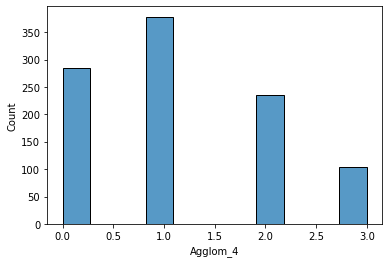

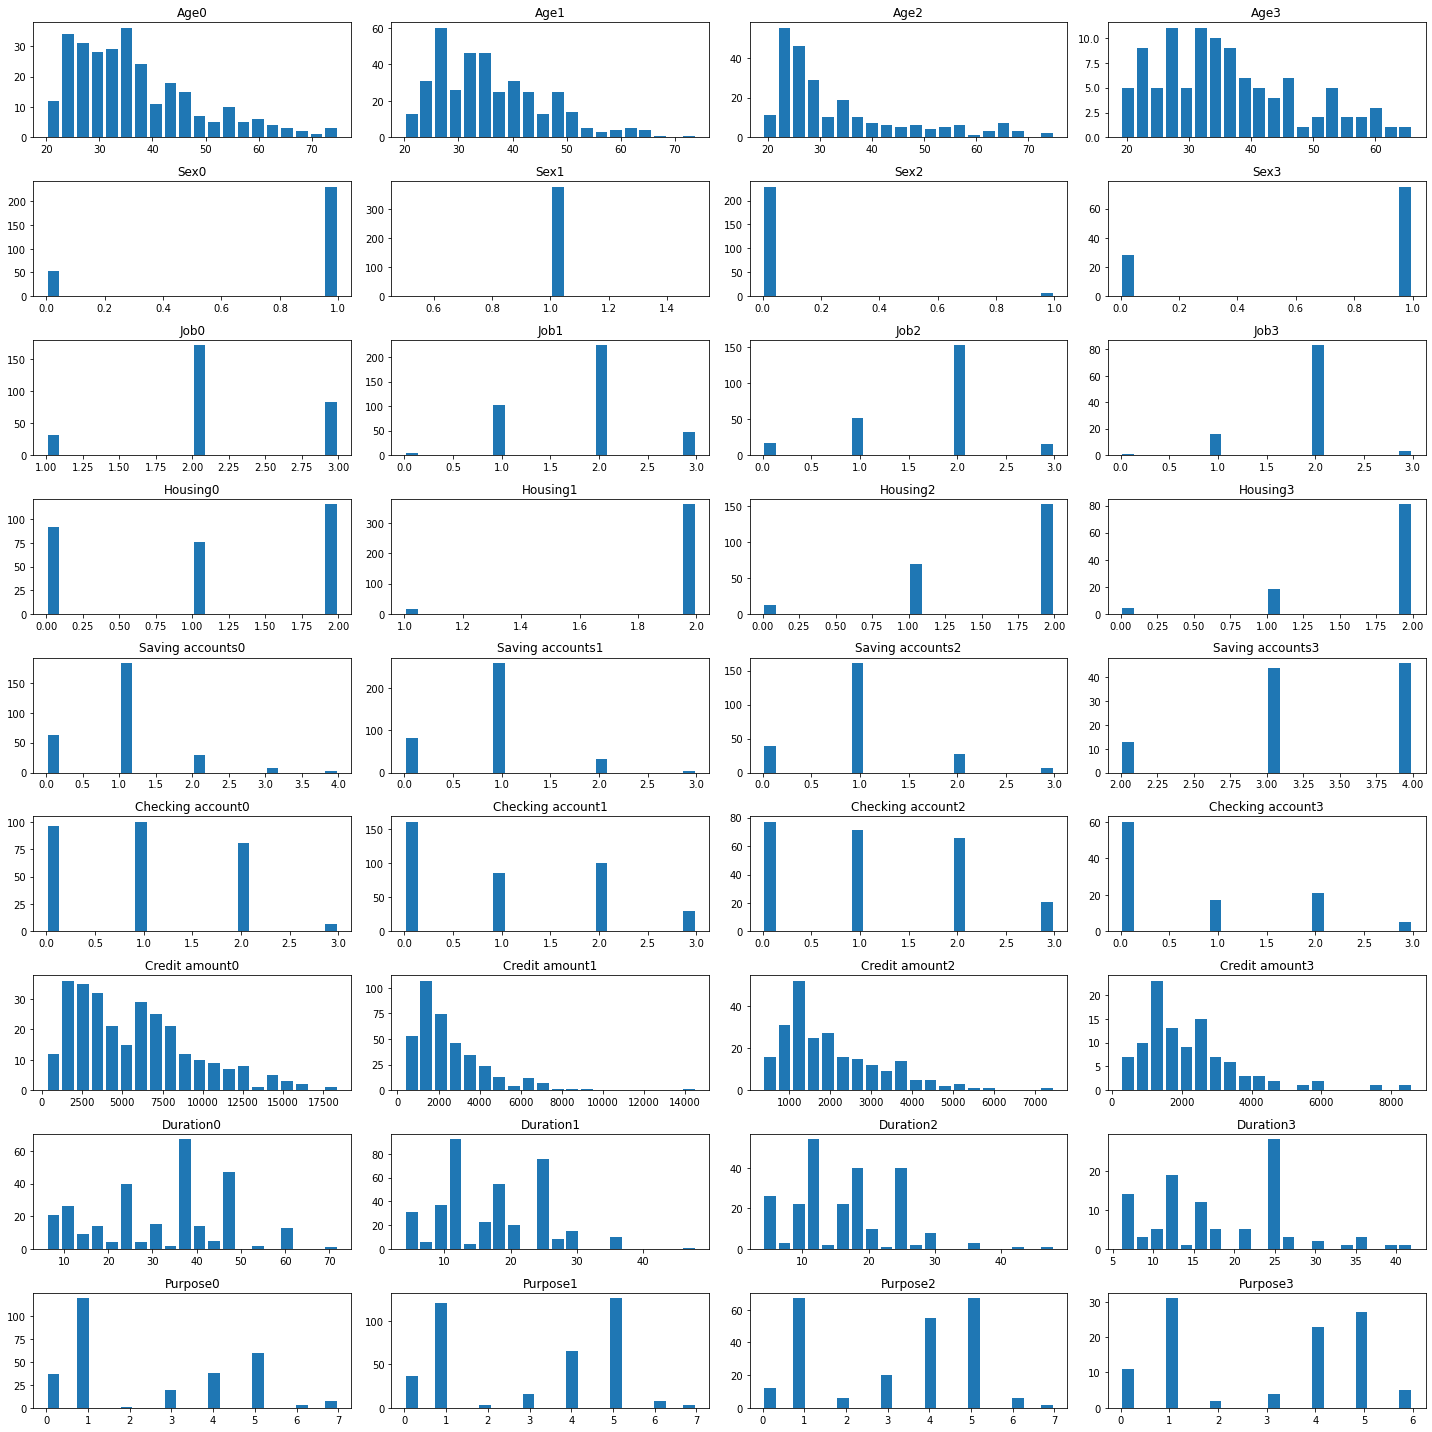

In [52]:
plot_values(labeled_data, 'Agglom_4', initial_columns)

При разбиении на 4 кластера группы менее явные. Остановимся на 5 кластерах.

# DBSCAN

In [53]:
def silhouette_sc(model, data, interval):
    
    from sklearn.metrics import silhouette_score
    silhouette_sc = []
    plt.figure(figsize=(10, 4))
    clusterer = model
    
    list_n_clusters = list(range(2, interval + 1))
    for n_clusters in list_n_clusters:
        clusterer.n_clusters = n_clusters
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_sc.append(silhouette_avg)

    plt.gca().set(title="The silhouette_score plot",
            xlabel="n_clusters",
            ylabel="silhouette_score")
    plt.plot(range(2,interval+1), silhouette_sc, marker='o');
    plt.legend()
    plt.show()

In [54]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np
import optuna
def objective(trial: optuna.Trial):
    eps = trial.suggest_float('eps', 0.05, 3, step=0.05)
    min_samples = trial.suggest_int('min_samples', 1, 30)
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data)
    dbscan_labels = dbscan_model.labels_
    
    if len(np.unique(dbscan_labels)) - 1 <= 1:
        return 0
    else:
        silhouette = silhouette_score(scaled_data, dbscan_labels)
    n_clusters = len(np.unique(dbscan_labels)) - 1   
    n_unsigned = pd.DataFrame(dbscan_labels).value_counts().get(-1)
    if n_clusters > 15:
        n_clusters = 0
   
    return silhouette, n_unsigned, n_clusters

In [55]:
import optuna

study = optuna.create_study(directions=["maximize", "minimize", "maximize"])
study.optimize(objective, n_trials=1000)

[I 2023-06-08 04:19:23,320] A new study created in memory with name: no-name-e487375d-61e8-4938-93d2-85d6ba395126
[I 2023-06-08 04:19:23,352] Trial 0 finished with values: [-0.22363923934966584, 911.0, 4.0] and parameters: {'eps': 1.05, 'min_samples': 13}. 
[W 2023-06-08 04:19:23,382] Trial 1 failed with parameters: {'eps': 0.8, 'min_samples': 1} because of the following error: The value None could not be cast to float..
[W 2023-06-08 04:19:23,382] Trial 1 failed with value (0.13042873551918166, None, 0).
[I 2023-06-08 04:19:23,423] Trial 2 finished with values: [0.054137108399985874, 35.0, 6.0] and parameters: {'eps': 2.25, 'min_samples': 2}. 
[I 2023-06-08 04:19:23,459] Trial 3 finished with values: [-0.0830537850974967, 748.0, 2.0] and parameters: {'eps': 1.4500000000000002, 'min_samples': 25}. 
[W 2023-06-08 04:19:23,489] Trial 4 failed with parameters: {'eps': 2.4, 'min_samples': 26} because of the following error: The number of the values 1 did not match the number of the objecti

[W 2023-06-08 04:19:24,672] Trial 39 failed with parameters: {'eps': 2.75, 'min_samples': 17} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:24,673] Trial 39 failed with value 0.
[I 2023-06-08 04:19:24,715] Trial 40 finished with values: [-0.1494436114155561, 822.0, 3.0] and parameters: {'eps': 1.2500000000000002, 'min_samples': 20}. 
[I 2023-06-08 04:19:24,756] Trial 41 finished with values: [-0.1975413159720913, 783.0, 7.0] and parameters: {'eps': 1.1500000000000001, 'min_samples': 13}. 
[I 2023-06-08 04:19:24,802] Trial 42 finished with values: [0.08750190466555656, 320.0, 2.0] and parameters: {'eps': 1.8, 'min_samples': 18}. 
[W 2023-06-08 04:19:24,813] Trial 43 failed with parameters: {'eps': 0.3, 'min_samples': 24} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:24,813] Trial 43 failed with value 0.
[I 2023-06-08 04:19:24,852

[W 2023-06-08 04:19:25,897] Trial 78 failed with parameters: {'eps': 0.2, 'min_samples': 8} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:25,898] Trial 78 failed with value 0.
[I 2023-06-08 04:19:25,944] Trial 79 finished with values: [0.08457095565038805, 329.0, 2.0] and parameters: {'eps': 1.9000000000000001, 'min_samples': 29}. 
[W 2023-06-08 04:19:25,980] Trial 80 failed with parameters: {'eps': 2.1999999999999997, 'min_samples': 10} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:25,980] Trial 80 failed with value 0.
[I 2023-06-08 04:19:26,020] Trial 81 finished with values: [-0.1866230284744089, 841.0, 5.0] and parameters: {'eps': 1.1500000000000001, 'min_samples': 14}. 
[I 2023-06-08 04:19:26,068] Trial 82 finished with values: [0.10040086774791772, 237.0, 2.0] and parameters: {'eps': 1.9000000000000001, 'min_samples': 15}.

[I 2023-06-08 04:19:27,302] Trial 117 finished with values: [-0.059811107420269176, 341.0, 5.0] and parameters: {'eps': 1.55, 'min_samples': 6}. 
[I 2023-06-08 04:19:27,342] Trial 118 finished with values: [-0.1975413159720913, 783.0, 7.0] and parameters: {'eps': 1.1500000000000001, 'min_samples': 13}. 
[W 2023-06-08 04:19:27,361] Trial 119 failed with parameters: {'eps': 0.7000000000000001, 'min_samples': 19} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:27,362] Trial 119 failed with value 0.
[I 2023-06-08 04:19:27,413] Trial 120 finished with values: [0.09608725201646993, 32.0, 4.0] and parameters: {'eps': 2.3, 'min_samples': 2}. 
[W 2023-06-08 04:19:27,433] Trial 121 failed with parameters: {'eps': 0.7500000000000001, 'min_samples': 23} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:27,434] Trial 121 failed with value 0.
[I 20

[W 2023-06-08 04:19:28,772] Trial 158 failed with value 0.
[I 2023-06-08 04:19:28,820] Trial 159 finished with values: [0.08457095565038805, 329.0, 2.0] and parameters: {'eps': 1.9000000000000001, 'min_samples': 29}. 
[I 2023-06-08 04:19:28,870] Trial 160 finished with values: [0.11166230587506291, 218.0, 2.0] and parameters: {'eps': 2.1, 'min_samples': 27}. 
[W 2023-06-08 04:19:28,890] Trial 161 failed with parameters: {'eps': 0.7500000000000001, 'min_samples': 26} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:28,891] Trial 161 failed with value 0.
[I 2023-06-08 04:19:28,939] Trial 162 finished with values: [0.09551561653522328, 286.0, 2.0] and parameters: {'eps': 1.9500000000000002, 'min_samples': 28}. 
[I 2023-06-08 04:19:28,985] Trial 163 finished with values: [0.06626930453555764, 385.0, 2.0] and parameters: {'eps': 1.7000000000000002, 'min_samples': 20}. 
[I 2023-06-08 04:19:29,026] Trial 164 finished

[W 2023-06-08 04:19:30,417] Trial 203 failed with value 0.
[I 2023-06-08 04:19:30,454] Trial 204 finished with values: [0.07849346795848508, 346.0, 2.0] and parameters: {'eps': 1.85, 'min_samples': 28}. 
[I 2023-06-08 04:19:30,503] Trial 205 finished with values: [0.12243959352984621, 113.0, 2.0] and parameters: {'eps': 2.0, 'min_samples': 6}. 
[I 2023-06-08 04:19:30,550] Trial 206 finished with values: [0.08877893243770818, 308.0, 2.0] and parameters: {'eps': 1.7000000000000002, 'min_samples': 10}. 
[W 2023-06-08 04:19:30,577] Trial 207 failed with parameters: {'eps': 1.3, 'min_samples': 30} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:30,578] Trial 207 failed with value 0.
[W 2023-06-08 04:19:30,618] Trial 208 failed with parameters: {'eps': 2.8, 'min_samples': 3} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:30,619] Trial 20

[I 2023-06-08 04:19:32,177] Trial 251 finished with values: [0.17905778377944978, 17.0, 3.0] and parameters: {'eps': 2.45, 'min_samples': 2}. 
[I 2023-06-08 04:19:32,212] Trial 252 finished with values: [-0.09528124246423826, 515.0, 6.0] and parameters: {'eps': 1.4500000000000002, 'min_samples': 11}. 
[I 2023-06-08 04:19:32,249] Trial 253 finished with values: [0.10514165922017762, 192.0, 2.0] and parameters: {'eps': 1.8, 'min_samples': 7}. 
[I 2023-06-08 04:19:32,284] Trial 254 finished with values: [-0.12838543399526542, 156.0, 0.0] and parameters: {'eps': 1.6500000000000001, 'min_samples': 2}. 
[I 2023-06-08 04:19:32,324] Trial 255 finished with values: [0.11337996760621968, 160.0, 2.0] and parameters: {'eps': 2.05, 'min_samples': 14}. 
[I 2023-06-08 04:19:32,364] Trial 256 finished with values: [0.1233718561755196, 119.0, 2.0] and parameters: {'eps': 2.15, 'min_samples': 12}. 
[W 2023-06-08 04:19:32,404] Trial 257 failed with parameters: {'eps': 0.6500000000000001, 'min_samples': 1

[W 2023-06-08 04:19:33,901] Trial 296 failed with value 0.
[I 2023-06-08 04:19:33,943] Trial 297 finished with values: [0.12885962766175554, 83.0, 2.0] and parameters: {'eps': 2.15, 'min_samples': 5}. 
[I 2023-06-08 04:19:33,986] Trial 298 finished with values: [0.19272778155748327, 9.0, 2.0] and parameters: {'eps': 2.8, 'min_samples': 2}. 
[I 2023-06-08 04:19:34,025] Trial 299 finished with values: [0.12076579250347766, 119.0, 2.0] and parameters: {'eps': 2.0, 'min_samples': 7}. 
[W 2023-06-08 04:19:34,057] Trial 300 failed with parameters: {'eps': 2.95, 'min_samples': 10} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:34,057] Trial 300 failed with value 0.
[I 2023-06-08 04:19:34,089] Trial 301 finished with values: [-0.2538666408243442, 779.0, 0.0] and parameters: {'eps': 0.9500000000000001, 'min_samples': 5}. 
[I 2023-06-08 04:19:34,122] Trial 302 finished with values: [-0.20190552796976435, 691.0, 11.0] 

[W 2023-06-08 04:19:35,666] Trial 340 failed with value 0.
[W 2023-06-08 04:19:35,716] Trial 341 failed with parameters: {'eps': 2.15, 'min_samples': 1} because of the following error: The value None could not be cast to float..
[W 2023-06-08 04:19:35,716] Trial 341 failed with value (-0.07349395576448133, None, 0).
[W 2023-06-08 04:19:35,730] Trial 342 failed with parameters: {'eps': 0.25, 'min_samples': 10} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:35,730] Trial 342 failed with value 0.
[I 2023-06-08 04:19:35,773] Trial 343 finished with values: [-0.11270371396901602, 267.0, 0.0] and parameters: {'eps': 1.5000000000000002, 'min_samples': 3}. 
[W 2023-06-08 04:19:35,811] Trial 344 failed with parameters: {'eps': 2.65, 'min_samples': 4} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:35,812] Trial 344 failed with value 0.
[I 2

[I 2023-06-08 04:19:37,197] Trial 383 finished with values: [-0.03540595439164966, 129.0, 14.0] and parameters: {'eps': 1.7500000000000002, 'min_samples': 2}. 
[I 2023-06-08 04:19:37,235] Trial 384 finished with values: [-0.24873562474759195, 871.0, 8.0] and parameters: {'eps': 0.9500000000000001, 'min_samples': 10}. 
[I 2023-06-08 04:19:37,282] Trial 385 finished with values: [0.12090716296277375, 128.0, 2.0] and parameters: {'eps': 2.1, 'min_samples': 11}. 
[I 2023-06-08 04:19:37,322] Trial 386 finished with values: [0.12663057702878927, 99.0, 2.0] and parameters: {'eps': 2.1, 'min_samples': 6}. 
[W 2023-06-08 04:19:37,359] Trial 387 failed with parameters: {'eps': 2.3, 'min_samples': 29} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:37,359] Trial 387 failed with value 0.
[W 2023-06-08 04:19:37,385] Trial 388 failed with parameters: {'eps': 1.1500000000000001, 'min_samples': 24} because of the following e

[W 2023-06-08 04:19:38,894] Trial 425 failed with value (-0.1585724613084297, None, 0).
[W 2023-06-08 04:19:38,914] Trial 426 failed with parameters: {'eps': 0.6000000000000001, 'min_samples': 15} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:38,914] Trial 426 failed with value 0.
[I 2023-06-08 04:19:38,944] Trial 427 finished with values: [-0.4206784380555855, 942.0, 0.0] and parameters: {'eps': 0.25, 'min_samples': 2}. 
[I 2023-06-08 04:19:38,999] Trial 428 finished with values: [0.19172848738833453, 13.0, 2.0] and parameters: {'eps': 2.65, 'min_samples': 2}. 
[W 2023-06-08 04:19:39,015] Trial 429 failed with parameters: {'eps': 0.4, 'min_samples': 30} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:39,015] Trial 429 failed with value 0.
[W 2023-06-08 04:19:39,040] Trial 430 failed with parameters: {'eps': 1.05, 'min_samples': 2

[I 2023-06-08 04:19:40,688] Trial 469 finished with values: [-0.24873562474759195, 871.0, 8.0] and parameters: {'eps': 0.9500000000000001, 'min_samples': 10}. 
[W 2023-06-08 04:19:40,729] Trial 470 failed with parameters: {'eps': 2.85, 'min_samples': 7} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:40,730] Trial 470 failed with value 0.
[I 2023-06-08 04:19:40,782] Trial 471 finished with values: [0.054137108399985874, 35.0, 6.0] and parameters: {'eps': 2.25, 'min_samples': 2}. 
[I 2023-06-08 04:19:40,833] Trial 472 finished with values: [0.12434729747397606, 114.0, 2.0] and parameters: {'eps': 2.15, 'min_samples': 11}. 
[I 2023-06-08 04:19:40,884] Trial 473 finished with values: [0.1233718561755196, 119.0, 2.0] and parameters: {'eps': 2.15, 'min_samples': 12}. 
[I 2023-06-08 04:19:40,921] Trial 474 finished with values: [-0.12000088812000918, 521.0, 0.0] and parameters: {'eps': 0.9500000000000001, 'min_samp

[I 2023-06-08 04:19:42,407] Trial 513 finished with values: [-0.03540595439164966, 129.0, 14.0] and parameters: {'eps': 1.7500000000000002, 'min_samples': 2}. 
[I 2023-06-08 04:19:42,439] Trial 514 finished with values: [-0.19644035363027376, 903.0, 3.0] and parameters: {'eps': 1.1500000000000001, 'min_samples': 19}. 
[I 2023-06-08 04:19:42,468] Trial 515 finished with values: [-0.23081763552328405, 703.0, 0.0] and parameters: {'eps': 0.9500000000000001, 'min_samples': 4}. 
[I 2023-06-08 04:19:42,506] Trial 516 finished with values: [0.10771214677342623, 174.0, 2.0] and parameters: {'eps': 2.0, 'min_samples': 13}. 
[I 2023-06-08 04:19:42,543] Trial 517 finished with values: [-0.03540595439164966, 129.0, 14.0] and parameters: {'eps': 1.7500000000000002, 'min_samples': 2}. 
[I 2023-06-08 04:19:42,581] Trial 518 finished with values: [0.02375237711161603, 70.0, 12.0] and parameters: {'eps': 1.9500000000000002, 'min_samples': 2}. 
[I 2023-06-08 04:19:42,617] Trial 519 finished with values:

[W 2023-06-08 04:19:44,183] Trial 558 failed with value 0.
[W 2023-06-08 04:19:44,214] Trial 559 failed with parameters: {'eps': 2.6, 'min_samples': 5} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:44,215] Trial 559 failed with value 0.
[I 2023-06-08 04:19:44,258] Trial 560 finished with values: [0.19272778155748327, 9.0, 2.0] and parameters: {'eps': 2.8, 'min_samples': 2}. 
[I 2023-06-08 04:19:44,297] Trial 561 finished with values: [0.10047044497101623, 86.0, 4.0] and parameters: {'eps': 1.9500000000000002, 'min_samples': 3}. 
[W 2023-06-08 04:19:44,311] Trial 562 failed with parameters: {'eps': 0.6000000000000001, 'min_samples': 27} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:44,312] Trial 562 failed with value 0.
[I 2023-06-08 04:19:44,351] Trial 563 finished with values: [0.02375237711161603, 70.0, 12.0] and parameters: {

[W 2023-06-08 04:19:45,869] Trial 602 failed with parameters: {'eps': 0.25, 'min_samples': 24} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:45,870] Trial 602 failed with value 0.
[I 2023-06-08 04:19:45,901] Trial 603 finished with values: [-0.3387014119528919, 828.0, 0.0] and parameters: {'eps': 0.45, 'min_samples': 2}. 
[I 2023-06-08 04:19:45,942] Trial 604 finished with values: [-0.18389509648319688, 566.0, 0.0] and parameters: {'eps': 1.1500000000000001, 'min_samples': 4}. 
[I 2023-06-08 04:19:45,988] Trial 605 finished with values: [-0.09768518066267078, 142.0, 0.0] and parameters: {'eps': 1.7000000000000002, 'min_samples': 2}. 
[I 2023-06-08 04:19:46,026] Trial 606 finished with values: [-0.10974035445403017, 499.0, 0.0] and parameters: {'eps': 1.0, 'min_samples': 2}. 
[I 2023-06-08 04:19:46,073] Trial 607 finished with values: [0.10785263052115826, 180.0, 2.0] and parameters: {'eps': 1.85, 'min_sampl

[W 2023-06-08 04:19:47,941] Trial 648 failed with value 0.
[W 2023-06-08 04:19:47,967] Trial 649 failed with parameters: {'eps': 1.1500000000000001, 'min_samples': 21} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:47,967] Trial 649 failed with value 0.
[I 2023-06-08 04:19:48,016] Trial 650 finished with values: [0.02375237711161603, 70.0, 12.0] and parameters: {'eps': 1.9500000000000002, 'min_samples': 2}. 
[I 2023-06-08 04:19:48,062] Trial 651 finished with values: [0.00940069516447523, 84.0, 14.0] and parameters: {'eps': 1.9000000000000001, 'min_samples': 2}. 
[W 2023-06-08 04:19:48,076] Trial 652 failed with parameters: {'eps': 0.55, 'min_samples': 19} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:48,077] Trial 652 failed with value 0.
[I 2023-06-08 04:19:48,126] Trial 653 finished with values: [0.10047044497101623, 86.0, 4.0

[I 2023-06-08 04:19:50,111] Trial 697 finished with values: [0.19272778155748327, 9.0, 2.0] and parameters: {'eps': 2.8, 'min_samples': 2}. 
[I 2023-06-08 04:19:50,160] Trial 698 finished with values: [0.08004679858310598, 333.0, 2.0] and parameters: {'eps': 1.7000000000000002, 'min_samples': 13}. 
[I 2023-06-08 04:19:50,201] Trial 699 finished with values: [0.10047044497101623, 86.0, 4.0] and parameters: {'eps': 1.9500000000000002, 'min_samples': 3}. 
[I 2023-06-08 04:19:50,254] Trial 700 finished with values: [0.054137108399985874, 35.0, 6.0] and parameters: {'eps': 2.25, 'min_samples': 2}. 
[W 2023-06-08 04:19:50,298] Trial 701 failed with parameters: {'eps': 2.85, 'min_samples': 2} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:50,298] Trial 701 failed with value 0.
[W 2023-06-08 04:19:50,313] Trial 702 failed with parameters: {'eps': 0.3, 'min_samples': 28} because of the following error: The number of 

[W 2023-06-08 04:19:51,901] Trial 740 failed with value 0.
[I 2023-06-08 04:19:51,952] Trial 741 finished with values: [0.0701618537449165, 50.0, 7.0] and parameters: {'eps': 2.15, 'min_samples': 2}. 
[I 2023-06-08 04:19:52,000] Trial 742 finished with values: [0.09321599593262903, 296.0, 2.0] and parameters: {'eps': 1.85, 'min_samples': 17}. 
[I 2023-06-08 04:19:52,041] Trial 743 finished with values: [-0.19648524510277462, 861.0, 5.0] and parameters: {'eps': 1.1, 'min_samples': 13}. 
[I 2023-06-08 04:19:52,090] Trial 744 finished with values: [0.10193219654844222, 257.0, 2.0] and parameters: {'eps': 2.0, 'min_samples': 25}. 
[I 2023-06-08 04:19:52,142] Trial 745 finished with values: [0.22832250252346006, 33.0, 2.0] and parameters: {'eps': 2.35, 'min_samples': 4}. 
[I 2023-06-08 04:19:52,191] Trial 746 finished with values: [0.10047044497101623, 86.0, 4.0] and parameters: {'eps': 1.9500000000000002, 'min_samples': 3}. 
[W 2023-06-08 04:19:52,228] Trial 747 failed with parameters: {'e

[I 2023-06-08 04:19:53,953] Trial 792 finished with values: [0.12107821752519521, 123.0, 2.0] and parameters: {'eps': 2.05, 'min_samples': 9}. 
[I 2023-06-08 04:19:54,009] Trial 793 finished with values: [0.09083344635609177, 97.0, 4.0] and parameters: {'eps': 1.9500000000000002, 'min_samples': 4}. 
[I 2023-06-08 04:19:54,065] Trial 794 finished with values: [0.10540768070307631, 188.0, 2.0] and parameters: {'eps': 1.85, 'min_samples': 9}. 
[I 2023-06-08 04:19:54,102] Trial 795 finished with values: [-0.20173522255250884, 670.0, 0.0] and parameters: {'eps': 0.6500000000000001, 'min_samples': 2}. 
[I 2023-06-08 04:19:54,140] Trial 796 finished with values: [-0.12000088812000918, 521.0, 0.0] and parameters: {'eps': 0.9500000000000001, 'min_samples': 2}. 
[I 2023-06-08 04:19:54,191] Trial 797 finished with values: [0.0701618537449165, 50.0, 7.0] and parameters: {'eps': 2.15, 'min_samples': 2}. 
[I 2023-06-08 04:19:54,240] Trial 798 finished with values: [0.02328817186418366, 65.0, 12.0] a

[I 2023-06-08 04:19:56,093] Trial 841 finished with values: [0.17908679065947122, 15.0, 3.0] and parameters: {'eps': 2.5, 'min_samples': 2}. 
[I 2023-06-08 04:19:56,140] Trial 842 finished with values: [-0.040727727861338596, 97.0, 15.0] and parameters: {'eps': 1.85, 'min_samples': 2}. 
[I 2023-06-08 04:19:56,189] Trial 843 finished with values: [0.10574836674202436, 226.0, 2.0] and parameters: {'eps': 1.9500000000000002, 'min_samples': 17}. 
[I 2023-06-08 04:19:56,222] Trial 844 finished with values: [-0.22992631896374588, 696.0, 0.0] and parameters: {'eps': 0.6000000000000001, 'min_samples': 2}. 
[W 2023-06-08 04:19:56,264] Trial 845 failed with parameters: {'eps': 2.95, 'min_samples': 15} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:56,264] Trial 845 failed with value 0.
[I 2023-06-08 04:19:56,313] Trial 846 finished with values: [0.02375237711161603, 70.0, 12.0] and parameters: {'eps': 1.95000000000000

[W 2023-06-08 04:19:58,206] Trial 891 failed with value 0.
[W 2023-06-08 04:19:58,222] Trial 892 failed with parameters: {'eps': 0.7000000000000001, 'min_samples': 27} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:58,223] Trial 892 failed with value 0.
[I 2023-06-08 04:19:58,259] Trial 893 finished with values: [-0.09768518066267078, 142.0, 0.0] and parameters: {'eps': 1.7000000000000002, 'min_samples': 2}. 
[I 2023-06-08 04:19:58,292] Trial 894 finished with values: [-0.142588899740886, 264.0, 0.0] and parameters: {'eps': 1.35, 'min_samples': 2}. 
[I 2023-06-08 04:19:58,331] Trial 895 finished with values: [0.08457095565038805, 329.0, 2.0] and parameters: {'eps': 1.9000000000000001, 'min_samples': 29}. 
[W 2023-06-08 04:19:58,362] Trial 896 failed with parameters: {'eps': 2.8, 'min_samples': 27} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 202

[W 2023-06-08 04:19:59,830] Trial 934 failed with value 0.
[I 2023-06-08 04:19:59,870] Trial 935 finished with values: [0.026458093673716654, 59.0, 11.0] and parameters: {'eps': 2.05, 'min_samples': 2}. 
[I 2023-06-08 04:19:59,905] Trial 936 finished with values: [0.057027261039651625, 410.0, 2.0] and parameters: {'eps': 1.6, 'min_samples': 12}. 
[I 2023-06-08 04:19:59,946] Trial 937 finished with values: [0.026458093673716654, 59.0, 11.0] and parameters: {'eps': 2.05, 'min_samples': 2}. 
[W 2023-06-08 04:19:59,958] Trial 938 failed with parameters: {'eps': 0.3, 'min_samples': 21} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:19:59,959] Trial 938 failed with value 0.
[I 2023-06-08 04:19:59,998] Trial 939 finished with values: [0.02328817186418366, 65.0, 12.0] and parameters: {'eps': 2.0, 'min_samples': 2}. 
[W 2023-06-08 04:20:00,038] Trial 940 failed with parameters: {'eps': 2.8, 'min_samples': 20} because of

[W 2023-06-08 04:20:01,590] Trial 980 failed with parameters: {'eps': 3.0, 'min_samples': 1} because of the following error: The value None could not be cast to float..
[W 2023-06-08 04:20:01,591] Trial 980 failed with value (0.3123593109047438, None, 3).
[I 2023-06-08 04:20:01,643] Trial 981 finished with values: [0.054137108399985874, 35.0, 6.0] and parameters: {'eps': 2.25, 'min_samples': 2}. 
[I 2023-06-08 04:20:01,693] Trial 982 finished with values: [0.02328817186418366, 65.0, 12.0] and parameters: {'eps': 2.0, 'min_samples': 2}. 
[I 2023-06-08 04:20:01,718] Trial 983 finished with values: [-0.3501547686772271, 844.0, 0.0] and parameters: {'eps': 0.4, 'min_samples': 2}. 
[I 2023-06-08 04:20:01,759] Trial 984 finished with values: [0.10785263052115826, 180.0, 2.0] and parameters: {'eps': 1.85, 'min_samples': 8}. 
[I 2023-06-08 04:20:01,800] Trial 985 finished with values: [0.031267721743221746, 41.0, 8.0] and parameters: {'eps': 2.1999999999999997, 'min_samples': 2}. 
[I 2023-06-0

In [56]:
study.best_trials

[FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.054137108399985874, 35.0, 6.0], datetime_start=datetime.datetime(2023, 6, 8, 4, 19, 23, 383054), datetime_complete=datetime.datetime(2023, 6, 8, 4, 19, 23, 423017), params={'eps': 2.25, 'min_samples': 2}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'eps': FloatDistribution(high=3.0, log=False, low=0.05, step=0.05), 'min_samples': IntDistribution(high=30, log=False, low=1, step=1)}, trial_id=2, value=None),
 FrozenTrial(number=120, state=TrialState.COMPLETE, values=[0.09608725201646993, 32.0, 4.0], datetime_start=datetime.datetime(2023, 6, 8, 4, 19, 27, 362639), datetime_complete=datetime.datetime(2023, 6, 8, 4, 19, 27, 413780), params={'eps': 2.3, 'min_samples': 2}, user_attrs={}, system_attrs={'nsga2:generation': 1}, intermediate_values={}, distributions={'eps': FloatDistribution(high=3.0, log=False, low=0.05, step=0.05), 'min_samples': IntDistribution(high=30, log=False, low=1,

In [57]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=2.2, min_samples=2).fit(scaled_data)
dbscan_labels = dbscan_model.labels_

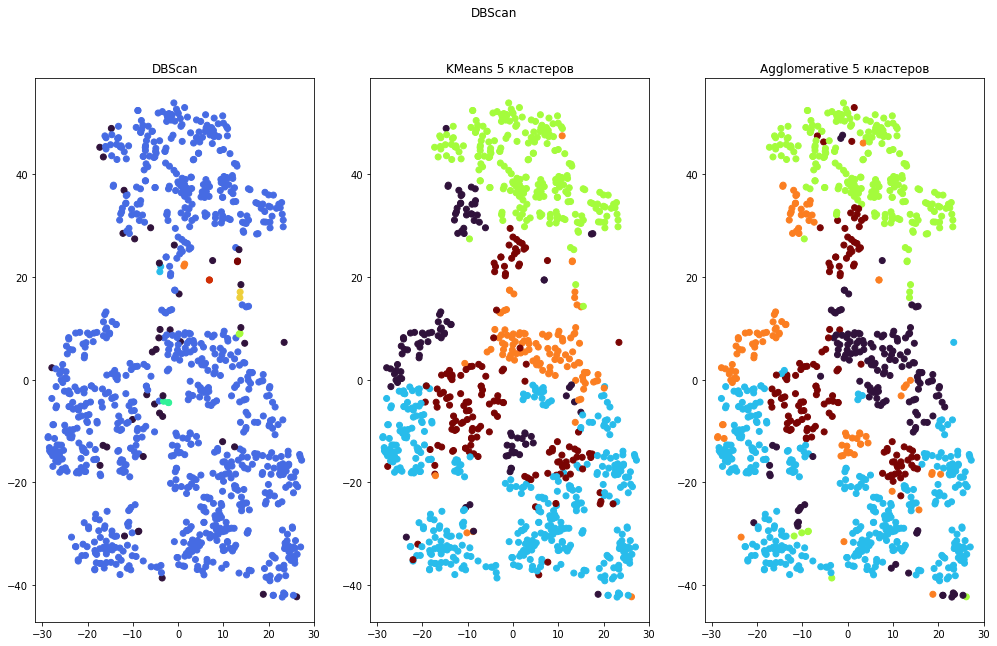

In [58]:
compare_clusters('DBScan', labels_1=dbscan_labels, labels_2=kmeans_labels_5, labels_3=agglom_labels_5,
                 reduced_data_1=tsne_data, reduced_data_2=tsne_data, reduced_data_3=tsne_data,
                 titles_for_data=['DBScan', 'KMeans 5 кластеров', 'Agglomerative 5 кластеров'])

На этих данных результаты получаются плохие. Слишком большая доля данных попадает в вылеты. Попробуем нелинейные преобразования данных.

In [59]:
coded_data_transformed = coded_data.copy()

Прологарифмируем категории с асимметричным распределением признаков.

In [61]:
for log_features in ['Age', 'Credit amount']:
    coded_data_transformed[log_features] = np.log(coded_data_transformed[log_features])

In [63]:
from sklearn.preprocessing import QuantileTransformer

scaler_modified = QuantileTransformer(n_quantiles=10, random_state=0)
scaler_modified.fit(coded_data_transformed)
scaled_data_modified = pd.DataFrame(scaler_modified.transform(coded_data_transformed), columns = coded_data_transformed.columns)

In [65]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data_modified = tsne.fit_transform(scaled_data_modified)

In [66]:
import umap
umap = umap.UMAP(n_components=2, random_state=42, n_neighbors=50, min_dist=0.3, metric='euclidean')
umap_data_modified = umap.fit_transform(scaled_data_modified)

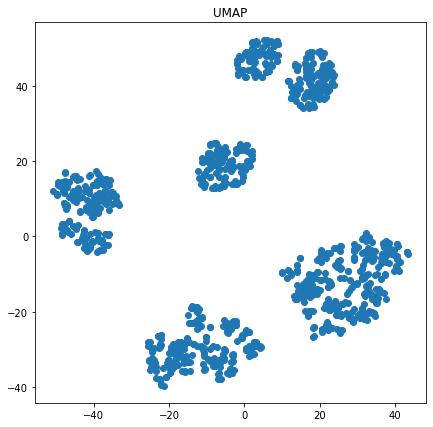

In [67]:
plot_clusters(tsne_data_modified, None, 'UMAP')

In [68]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np
import optuna
def objective(trial: optuna.Trial):
    eps = trial.suggest_float('eps', 0.05, 3, step=0.05)
    min_samples = trial.suggest_int('min_samples', 1, 30)
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data_modified)
    dbscan_labels = dbscan_model.labels_
    
    if len(np.unique(dbscan_labels)) - 1 <= 1:
        return 0
    else:
        silhouette = silhouette_score(scaled_data_modified, dbscan_labels)
    n_clusters = len(np.unique(dbscan_labels)) - 1   
    n_unsigned = pd.DataFrame(dbscan_labels).value_counts().get(-1)
    if n_clusters > 15:
        n_clusters = 0
   
    return silhouette, n_unsigned, n_clusters

In [69]:
import optuna

study = optuna.create_study(directions=["maximize", "minimize", "maximize"])
study.optimize(objective, n_trials=1000)

[I 2023-06-08 04:20:07,920] A new study created in memory with name: no-name-1ae99515-73fe-49e5-b8e9-933d0179b1ac
[W 2023-06-08 04:20:07,938] Trial 0 failed with parameters: {'eps': 2.35, 'min_samples': 25} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:07,938] Trial 0 failed with value 0.
[I 2023-06-08 04:20:07,970] Trial 1 finished with values: [0.232887611907096, 12.0, 4.0] and parameters: {'eps': 0.7000000000000001, 'min_samples': 9}. 
[W 2023-06-08 04:20:07,995] Trial 2 failed with parameters: {'eps': 2.15, 'min_samples': 6} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:07,995] Trial 2 failed with value 0.
[W 2023-06-08 04:20:08,022] Trial 3 failed with parameters: {'eps': 1.0, 'min_samples': 27} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:08,0

[W 2023-06-08 04:20:08,801] Trial 33 failed with value 0.
[W 2023-06-08 04:20:08,834] Trial 34 failed with parameters: {'eps': 1.1500000000000001, 'min_samples': 21} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:08,835] Trial 34 failed with value 0.
[W 2023-06-08 04:20:08,867] Trial 35 failed with parameters: {'eps': 1.1, 'min_samples': 16} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:08,868] Trial 35 failed with value 0.
[W 2023-06-08 04:20:08,895] Trial 36 failed with parameters: {'eps': 1.0, 'min_samples': 26} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:08,896] Trial 36 failed with value 0.
[W 2023-06-08 04:20:08,908] Trial 37 failed with parameters: {'eps': 2.5, 'min_samples': 17} because of the following error: The number of the values 1 did 

[W 2023-06-08 04:20:09,887] Trial 68 failed with value 0.
[W 2023-06-08 04:20:09,897] Trial 69 failed with parameters: {'eps': 2.9, 'min_samples': 28} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:09,897] Trial 69 failed with value 0.
[W 2023-06-08 04:20:09,938] Trial 70 failed with parameters: {'eps': 1.85, 'min_samples': 6} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:09,939] Trial 70 failed with value 0.
[W 2023-06-08 04:20:09,956] Trial 71 failed with parameters: {'eps': 0.15000000000000002, 'min_samples': 29} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:09,956] Trial 71 failed with value 0.
[W 2023-06-08 04:20:09,998] Trial 72 failed with parameters: {'eps': 1.85, 'min_samples': 3} because of the following error: The number of the values 1 did

[W 2023-06-08 04:20:10,856] Trial 102 failed with value 0.
[W 2023-06-08 04:20:10,873] Trial 103 failed with parameters: {'eps': 2.35, 'min_samples': 4} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:10,873] Trial 103 failed with value 0.
[W 2023-06-08 04:20:10,909] Trial 104 failed with parameters: {'eps': 1.4000000000000001, 'min_samples': 6} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:10,910] Trial 104 failed with value 0.
[I 2023-06-08 04:20:10,942] Trial 105 finished with values: [-0.00692227973349264, 455.0, 6.0] and parameters: {'eps': 0.55, 'min_samples': 19}. 
[W 2023-06-08 04:20:10,950] Trial 106 failed with parameters: {'eps': 2.65, 'min_samples': 12} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:10,950] Trial 106 failed with value 0.
[W 

[W 2023-06-08 04:20:11,633] Trial 135 failed with value 0.
[W 2023-06-08 04:20:11,668] Trial 136 failed with parameters: {'eps': 1.55, 'min_samples': 5} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:11,668] Trial 136 failed with value 0.
[W 2023-06-08 04:20:11,682] Trial 137 failed with parameters: {'eps': 2.4, 'min_samples': 29} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:11,682] Trial 137 failed with value 0.
[W 2023-06-08 04:20:11,691] Trial 138 failed with parameters: {'eps': 2.9, 'min_samples': 10} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:11,691] Trial 138 failed with value 0.
[I 2023-06-08 04:20:11,719] Trial 139 finished with values: [-0.2247473632489067, 983.0, 2.0] and parameters: {'eps': 0.25, 'min_samples': 8}. 
[W 2023-06-08 04:20:

[W 2023-06-08 04:20:12,677] Trial 170 failed with value 0.
[W 2023-06-08 04:20:12,716] Trial 171 failed with parameters: {'eps': 1.9500000000000002, 'min_samples': 18} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:12,716] Trial 171 failed with value 0.
[W 2023-06-08 04:20:12,744] Trial 172 failed with parameters: {'eps': 2.1999999999999997, 'min_samples': 19} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:12,744] Trial 172 failed with value 0.
[W 2023-06-08 04:20:12,753] Trial 173 failed with parameters: {'eps': 2.75, 'min_samples': 3} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:12,753] Trial 173 failed with value 0.
[W 2023-06-08 04:20:12,762] Trial 174 failed with parameters: {'eps': 2.9, 'min_samples': 14} because of the following error: The numb

[W 2023-06-08 04:20:13,620] Trial 204 failed with parameters: {'eps': 2.05, 'min_samples': 9} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:13,620] Trial 204 failed with value 0.
[W 2023-06-08 04:20:13,629] Trial 205 failed with parameters: {'eps': 2.75, 'min_samples': 10} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:13,629] Trial 205 failed with value 0.
[W 2023-06-08 04:20:13,637] Trial 206 failed with parameters: {'eps': 2.8, 'min_samples': 16} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:13,638] Trial 206 failed with value 0.
[W 2023-06-08 04:20:13,674] Trial 207 failed with parameters: {'eps': 1.6, 'min_samples': 30} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:13

[I 2023-06-08 04:20:14,466] Trial 237 finished with values: [-0.053914789049677045, 599.0, 5.0] and parameters: {'eps': 0.5, 'min_samples': 16}. 
[I 2023-06-08 04:20:14,500] Trial 238 finished with values: [0.2167438066940278, 59.0, 4.0] and parameters: {'eps': 0.7500000000000001, 'min_samples': 30}. 
[W 2023-06-08 04:20:14,511] Trial 239 failed with parameters: {'eps': 2.5, 'min_samples': 17} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:14,512] Trial 239 failed with value 0.
[W 2023-06-08 04:20:14,544] Trial 240 failed with parameters: {'eps': 0.7500000000000001, 'min_samples': 1} because of the following error: The value None could not be cast to float..
[W 2023-06-08 04:20:14,545] Trial 240 failed with value (0.22292835509116402, None, 4).
[W 2023-06-08 04:20:14,569] Trial 241 failed with parameters: {'eps': 2.15, 'min_samples': 16} because of the following error: The number of the values 1 did not matc

[W 2023-06-08 04:20:15,403] Trial 270 failed with value 0.
[W 2023-06-08 04:20:15,435] Trial 271 failed with parameters: {'eps': 1.85, 'min_samples': 16} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:15,435] Trial 271 failed with value 0.
[W 2023-06-08 04:20:15,470] Trial 272 failed with parameters: {'eps': 1.4500000000000002, 'min_samples': 17} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:15,470] Trial 272 failed with value 0.
[W 2023-06-08 04:20:15,504] Trial 273 failed with parameters: {'eps': 1.7500000000000002, 'min_samples': 13} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:15,504] Trial 273 failed with value 0.
[I 2023-06-08 04:20:15,535] Trial 274 finished with values: [-0.12737878029293936, 858.0, 3.0] and parameters: {'eps': 0.5, 'min_samp

[I 2023-06-08 04:20:16,540] Trial 306 finished with values: [0.11848007586397862, 155.0, 11.0] and parameters: {'eps': 0.55, 'min_samples': 6}. 
[W 2023-06-08 04:20:16,577] Trial 307 failed with parameters: {'eps': 1.2500000000000002, 'min_samples': 16} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:16,577] Trial 307 failed with value 0.
[I 2023-06-08 04:20:16,609] Trial 308 finished with values: [0.09987443381015833, 235.0, 8.0] and parameters: {'eps': 0.55, 'min_samples': 8}. 
[W 2023-06-08 04:20:16,620] Trial 309 failed with parameters: {'eps': 2.5, 'min_samples': 25} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:16,620] Trial 309 failed with value 0.
[I 2023-06-08 04:20:16,652] Trial 310 finished with values: [-0.16335488665091338, 748.0, 8.0] and parameters: {'eps': 0.45, 'min_samples': 15}. 
[I 2023-06-08 04:20:16,685] Tria

[I 2023-06-08 04:20:17,728] Trial 347 finished with values: [0.23620906871026898, 10.0, 4.0] and parameters: {'eps': 0.8, 'min_samples': 21}. 
[I 2023-06-08 04:20:17,761] Trial 348 finished with values: [0.1993670986159367, 97.0, 4.0] and parameters: {'eps': 0.7000000000000001, 'min_samples': 25}. 
[W 2023-06-08 04:20:17,784] Trial 349 failed with parameters: {'eps': 0.8500000000000001, 'min_samples': 7} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:17,784] Trial 349 failed with value 0.
[I 2023-06-08 04:20:17,816] Trial 350 finished with values: [0.22898505336582634, 31.0, 4.0] and parameters: {'eps': 0.7000000000000001, 'min_samples': 13}. 
[W 2023-06-08 04:20:17,830] Trial 351 failed with parameters: {'eps': 0.1, 'min_samples': 19} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:17,831] Trial 351 failed with value 0.
[I 2023-06

[W 2023-06-08 04:20:19,032] Trial 386 failed with value 0.
[W 2023-06-08 04:20:19,063] Trial 387 failed with parameters: {'eps': 2.15, 'min_samples': 29} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:19,063] Trial 387 failed with value 0.
[I 2023-06-08 04:20:19,103] Trial 388 finished with values: [-0.053914789049677045, 599.0, 5.0] and parameters: {'eps': 0.5, 'min_samples': 16}. 
[I 2023-06-08 04:20:19,145] Trial 389 finished with values: [0.22292835509116402, 1.0, 4.0] and parameters: {'eps': 0.7500000000000001, 'min_samples': 2}. 
[I 2023-06-08 04:20:19,186] Trial 390 finished with values: [0.23070167354254556, 9.0, 4.0] and parameters: {'eps': 0.7000000000000001, 'min_samples': 6}. 
[I 2023-06-08 04:20:19,219] Trial 391 finished with values: [-0.3495704350844714, 848.0, 0.0] and parameters: {'eps': 0.25, 'min_samples': 4}. 
[I 2023-06-08 04:20:19,289] Trial 392 finished with values: [0.0552669178338310

[W 2023-06-08 04:20:20,396] Trial 426 failed with parameters: {'eps': 1.5000000000000002, 'min_samples': 8} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:20,396] Trial 426 failed with value 0.
[W 2023-06-08 04:20:20,440] Trial 427 failed with parameters: {'eps': 1.7500000000000002, 'min_samples': 8} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:20,441] Trial 427 failed with value 0.
[W 2023-06-08 04:20:20,471] Trial 428 failed with parameters: {'eps': 2.15, 'min_samples': 10} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:20,472] Trial 428 failed with value 0.
[W 2023-06-08 04:20:20,483] Trial 429 failed with parameters: {'eps': 2.65, 'min_samples': 16} because of the following error: The number of the values 1 did not match the number of the objectiv

[W 2023-06-08 04:20:21,407] Trial 462 failed with value 0.
[W 2023-06-08 04:20:21,417] Trial 463 failed with parameters: {'eps': 2.8, 'min_samples': 4} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:21,417] Trial 463 failed with value 0.
[W 2023-06-08 04:20:21,462] Trial 464 failed with parameters: {'eps': 1.7000000000000002, 'min_samples': 8} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:21,462] Trial 464 failed with value 0.
[W 2023-06-08 04:20:21,473] Trial 465 failed with parameters: {'eps': 2.6, 'min_samples': 21} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:21,474] Trial 465 failed with value 0.
[W 2023-06-08 04:20:21,509] Trial 466 failed with parameters: {'eps': 1.6500000000000001, 'min_samples': 28} because of the following error: The number

[W 2023-06-08 04:20:22,744] Trial 502 failed with value 0.
[W 2023-06-08 04:20:22,764] Trial 503 failed with parameters: {'eps': 0.25, 'min_samples': 28} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:22,764] Trial 503 failed with value 0.
[W 2023-06-08 04:20:22,809] Trial 504 failed with parameters: {'eps': 1.4500000000000002, 'min_samples': 11} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:22,809] Trial 504 failed with value 0.
[I 2023-06-08 04:20:22,850] Trial 505 finished with values: [0.23253498288947255, 3.0, 4.0] and parameters: {'eps': 0.7000000000000001, 'min_samples': 3}. 
[W 2023-06-08 04:20:22,864] Trial 506 failed with parameters: {'eps': 2.5, 'min_samples': 3} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:22,864] Trial 506 failed with va

[W 2023-06-08 04:20:24,097] Trial 541 failed with value 0.
[I 2023-06-08 04:20:24,137] Trial 542 finished with values: [0.11848007586397862, 155.0, 11.0] and parameters: {'eps': 0.55, 'min_samples': 6}. 
[W 2023-06-08 04:20:24,157] Trial 543 failed with parameters: {'eps': 2.35, 'min_samples': 5} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:24,158] Trial 543 failed with value 0.
[W 2023-06-08 04:20:24,202] Trial 544 failed with parameters: {'eps': 1.4000000000000001, 'min_samples': 18} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:24,203] Trial 544 failed with value 0.
[W 2023-06-08 04:20:24,239] Trial 545 failed with parameters: {'eps': 2.05, 'min_samples': 9} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:24,240] Trial 545 failed with value 0.
[I 2

[W 2023-06-08 04:20:25,502] Trial 582 failed with parameters: {'eps': 3.0, 'min_samples': 24} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:25,502] Trial 582 failed with value 0.
[I 2023-06-08 04:20:25,537] Trial 583 finished with values: [-0.30267100210037823, 760.0, 0.0] and parameters: {'eps': 0.25, 'min_samples': 3}. 
[I 2023-06-08 04:20:25,578] Trial 584 finished with values: [0.22292835509116402, 1.0, 4.0] and parameters: {'eps': 0.7500000000000001, 'min_samples': 2}. 
[W 2023-06-08 04:20:25,623] Trial 585 failed with parameters: {'eps': 1.6, 'min_samples': 7} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:25,623] Trial 585 failed with value 0.
[I 2023-06-08 04:20:25,663] Trial 586 finished with values: [0.05526691783383103, 355.0, 6.0] and parameters: {'eps': 0.55, 'min_samples': 14}. 
[W 2023-06-08 04:20:25,674] Trial 587

[I 2023-06-08 04:20:27,119] Trial 624 finished with values: [0.235004882300823, 8.0, 4.0] and parameters: {'eps': 0.8, 'min_samples': 19}. 
[I 2023-06-08 04:20:27,152] Trial 625 finished with values: [0.22928719844733034, 28.0, 4.0] and parameters: {'eps': 0.7500000000000001, 'min_samples': 24}. 
[W 2023-06-08 04:20:27,188] Trial 626 failed with parameters: {'eps': 1.4000000000000001, 'min_samples': 8} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:27,189] Trial 626 failed with value 0.
[W 2023-06-08 04:20:27,226] Trial 627 failed with parameters: {'eps': 1.6500000000000001, 'min_samples': 12} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:27,226] Trial 627 failed with value 0.
[W 2023-06-08 04:20:27,271] Trial 628 failed with parameters: {'eps': 1.6500000000000001, 'min_samples': 15} because of the following error: The number of 

[W 2023-06-08 04:20:28,464] Trial 661 failed with value 0.
[W 2023-06-08 04:20:28,510] Trial 662 failed with parameters: {'eps': 1.6, 'min_samples': 5} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:28,510] Trial 662 failed with value 0.
[W 2023-06-08 04:20:28,554] Trial 663 failed with parameters: {'eps': 1.35, 'min_samples': 28} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:28,555] Trial 663 failed with value 0.
[W 2023-06-08 04:20:28,592] Trial 664 failed with parameters: {'eps': 1.85, 'min_samples': 25} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:28,592] Trial 664 failed with value 0.
[W 2023-06-08 04:20:28,605] Trial 665 failed with parameters: {'eps': 2.45, 'min_samples': 9} because of the following error: The number of the values 1 did not ma

[W 2023-06-08 04:20:29,680] Trial 701 failed with parameters: {'eps': 2.95, 'min_samples': 12} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:29,680] Trial 701 failed with value 0.
[W 2023-06-08 04:20:29,713] Trial 702 failed with parameters: {'eps': 1.85, 'min_samples': 19} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:29,713] Trial 702 failed with value 0.
[I 2023-06-08 04:20:29,740] Trial 703 finished with values: [-0.386459665795352, 949.0, 15.0] and parameters: {'eps': 0.15000000000000002, 'min_samples': 3}. 
[W 2023-06-08 04:20:29,786] Trial 704 failed with parameters: {'eps': 1.6, 'min_samples': 10} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:29,786] Trial 704 failed with value 0.
[W 2023-06-08 04:20:29,828] Trial 705 failed with parameters: 

[W 2023-06-08 04:20:30,993] Trial 740 failed with parameters: {'eps': 1.2500000000000002, 'min_samples': 14} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:30,994] Trial 740 failed with value 0.
[W 2023-06-08 04:20:31,028] Trial 741 failed with parameters: {'eps': 2.1, 'min_samples': 7} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:31,028] Trial 741 failed with value 0.
[W 2023-06-08 04:20:31,058] Trial 742 failed with parameters: {'eps': 0.9500000000000001, 'min_samples': 9} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:31,058] Trial 742 failed with value 0.
[W 2023-06-08 04:20:31,102] Trial 743 failed with parameters: {'eps': 0.8, 'min_samples': 6} because of the following error: The value None could not be cast to float..
[W 2023-06-08 04:20:31,102

[I 2023-06-08 04:20:32,488] Trial 781 finished with values: [-0.09062245293204528, 482.0, 13.0] and parameters: {'eps': 0.45, 'min_samples': 7}. 
[W 2023-06-08 04:20:32,520] Trial 782 failed with parameters: {'eps': 1.1, 'min_samples': 12} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:32,521] Trial 782 failed with value 0.
[I 2023-06-08 04:20:32,551] Trial 783 finished with values: [-0.24973433046406843, 802.0, 13.0] and parameters: {'eps': 0.35000000000000003, 'min_samples': 8}. 
[I 2023-06-08 04:20:32,585] Trial 784 finished with values: [0.22292835509116402, 1.0, 4.0] and parameters: {'eps': 0.7500000000000001, 'min_samples': 5}. 
[I 2023-06-08 04:20:32,620] Trial 785 finished with values: [0.22292835509116402, 1.0, 4.0] and parameters: {'eps': 0.7500000000000001, 'min_samples': 3}. 
[I 2023-06-08 04:20:32,655] Trial 786 finished with values: [0.235004882300823, 8.0, 4.0] and parameters: {'eps': 0.8, 'mi

[W 2023-06-08 04:20:33,871] Trial 822 failed with parameters: {'eps': 2.0, 'min_samples': 9} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:33,871] Trial 822 failed with value 0.
[W 2023-06-08 04:20:33,882] Trial 823 failed with parameters: {'eps': 2.7, 'min_samples': 8} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:33,882] Trial 823 failed with value 0.
[I 2023-06-08 04:20:33,924] Trial 824 finished with values: [0.2315875781572051, 19.0, 4.0] and parameters: {'eps': 0.7500000000000001, 'min_samples': 19}. 
[I 2023-06-08 04:20:33,968] Trial 825 finished with values: [0.22292835509116402, 1.0, 4.0] and parameters: {'eps': 0.8, 'min_samples': 11}. 
[W 2023-06-08 04:20:34,008] Trial 826 failed with parameters: {'eps': 1.9500000000000002, 'min_samples': 19} because of the following error: The number of the values 1 did not match the

[W 2023-06-08 04:20:35,275] Trial 863 failed with value 0.
[W 2023-06-08 04:20:35,304] Trial 864 failed with parameters: {'eps': 2.1999999999999997, 'min_samples': 8} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:35,304] Trial 864 failed with value 0.
[I 2023-06-08 04:20:35,343] Trial 865 finished with values: [-0.04458163135406659, 166.0, 0.0] and parameters: {'eps': 0.45, 'min_samples': 2}. 
[I 2023-06-08 04:20:35,385] Trial 866 finished with values: [0.23555398609589834, 13.0, 4.0] and parameters: {'eps': 0.8, 'min_samples': 29}. 
[W 2023-06-08 04:20:35,411] Trial 867 failed with parameters: {'eps': 2.25, 'min_samples': 20} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:35,411] Trial 867 failed with value 0.
[I 2023-06-08 04:20:35,453] Trial 868 finished with values: [0.23555398609589834, 13.0, 4.0] and parameters: {'eps': 0.8

[W 2023-06-08 04:20:36,669] Trial 902 failed with value 0.
[W 2023-06-08 04:20:36,711] Trial 903 failed with parameters: {'eps': 1.4000000000000001, 'min_samples': 22} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:36,712] Trial 903 failed with value 0.
[I 2023-06-08 04:20:36,750] Trial 904 finished with values: [0.2136257630317883, 2.0, 2.0] and parameters: {'eps': 0.8500000000000001, 'min_samples': 24}. 
[W 2023-06-08 04:20:36,769] Trial 905 failed with parameters: {'eps': 0.2, 'min_samples': 22} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:36,770] Trial 905 failed with value 0.
[I 2023-06-08 04:20:36,813] Trial 906 finished with values: [0.22928719844733034, 28.0, 4.0] and parameters: {'eps': 0.7500000000000001, 'min_samples': 24}. 
[W 2023-06-08 04:20:36,834] Trial 907 failed with parameters: {'eps': 2.35, 'min_samples': 9} 

[W 2023-06-08 04:20:38,336] Trial 948 failed with parameters: {'eps': 1.9000000000000001, 'min_samples': 4} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:38,336] Trial 948 failed with value 0.
[W 2023-06-08 04:20:38,346] Trial 949 failed with parameters: {'eps': 2.95, 'min_samples': 5} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:38,347] Trial 949 failed with value 0.
[I 2023-06-08 04:20:38,388] Trial 950 finished with values: [0.22292835509116402, 1.0, 4.0] and parameters: {'eps': 0.7500000000000001, 'min_samples': 5}. 
[W 2023-06-08 04:20:38,434] Trial 951 failed with parameters: {'eps': 1.55, 'min_samples': 12} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:38,435] Trial 951 failed with value 0.
[W 2023-06-08 04:20:38,465] Trial 952 failed with pa

[W 2023-06-08 04:20:39,929] Trial 989 failed with value 0.
[W 2023-06-08 04:20:39,972] Trial 990 failed with parameters: {'eps': 1.2500000000000002, 'min_samples': 8} because of the following error: The number of the values 1 did not match the number of the objectives 3..
[W 2023-06-08 04:20:39,972] Trial 990 failed with value 0.
[I 2023-06-08 04:20:40,011] Trial 991 finished with values: [0.017445687925464932, 233.0, 0.0] and parameters: {'eps': 0.5, 'min_samples': 5}. 
[I 2023-06-08 04:20:40,051] Trial 992 finished with values: [-0.04769449901306608, 386.0, 13.0] and parameters: {'eps': 0.5, 'min_samples': 8}. 
[I 2023-06-08 04:20:40,091] Trial 993 finished with values: [0.14226031780477932, 110.0, 12.0] and parameters: {'eps': 0.55, 'min_samples': 4}. 
[I 2023-06-08 04:20:40,133] Trial 994 finished with values: [0.21355097792285235, 66.0, 4.0] and parameters: {'eps': 0.6500000000000001, 'min_samples': 12}. 
[W 2023-06-08 04:20:40,161] Trial 995 failed with parameters: {'eps': 2.1999

In [70]:
study.best_trials

[FrozenTrial(number=183, state=TrialState.COMPLETE, values=[0.2331621672700154, 2.0, 4.0], datetime_start=datetime.datetime(2023, 6, 8, 4, 20, 13, 20020), datetime_complete=datetime.datetime(2023, 6, 8, 4, 20, 13, 54638), params={'eps': 0.8, 'min_samples': 12}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'eps': FloatDistribution(high=3.0, log=False, low=0.05, step=0.05), 'min_samples': IntDistribution(high=30, log=False, low=1, step=1)}, trial_id=183, value=None),
 FrozenTrial(number=288, state=TrialState.COMPLETE, values=[-0.1750544130735371, 661.0, 15.0], datetime_start=datetime.datetime(2023, 6, 8, 4, 20, 15, 972669), datetime_complete=datetime.datetime(2023, 6, 8, 4, 20, 16, 4174), params={'eps': 0.4, 'min_samples': 8}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'eps': FloatDistribution(high=3.0, log=False, low=0.05, step=0.05), 'min_samples': IntDistribution(high=30, log=False, low=1, 

In [71]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.75, min_samples=5).fit(scaled_data_modified)
dbscan_labels_modified = dbscan_model.labels_

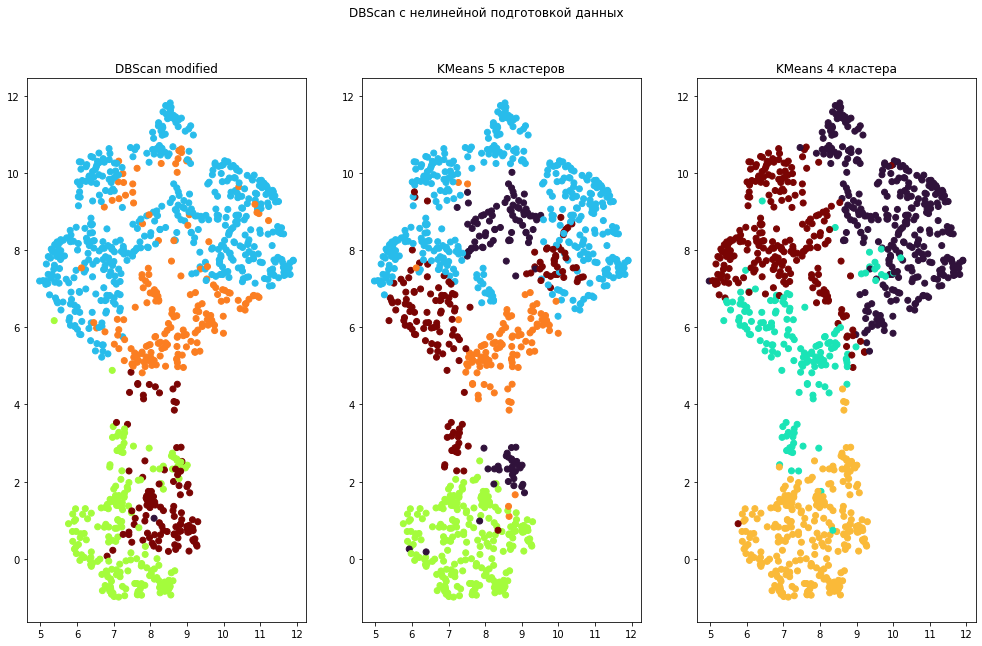

In [72]:
compare_clusters('DBScan с нелинейной подготовкой данных', labels_1=dbscan_labels_modified,
                 labels_2=kmeans_labels_5, labels_3=kmeans_labels_4,
                 reduced_data_1=umap_data, reduced_data_2=umap_data, reduced_data_3=umap_data,
                 titles_for_data=['DBScan modified', 'KMeans 5 кластеров', 'KMeans 4 кластера'])

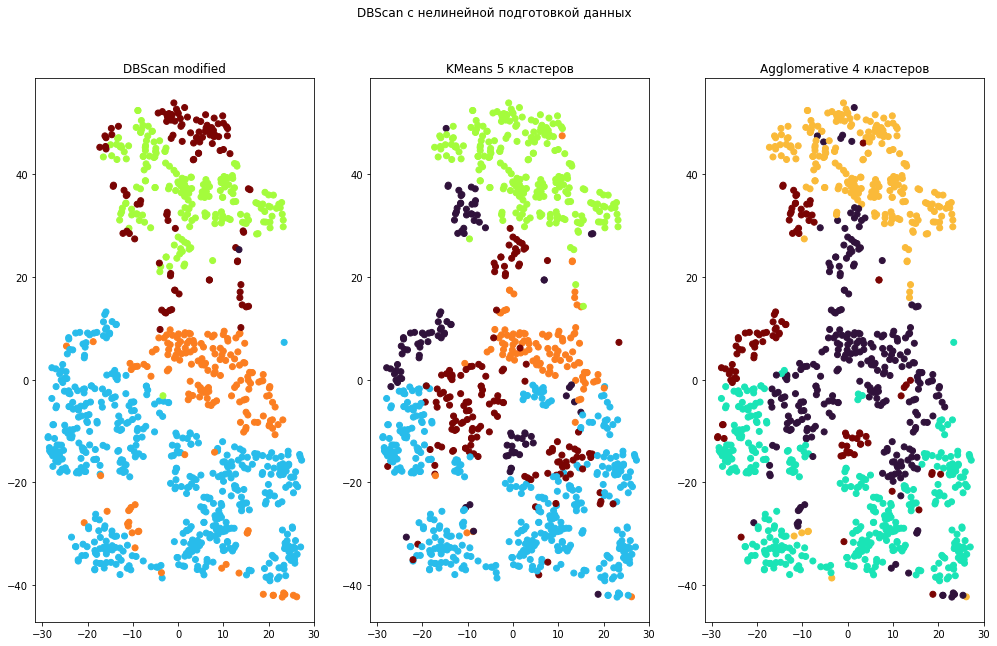

In [73]:
compare_clusters('DBScan с нелинейной подготовкой данных', labels_1=dbscan_labels_modified,
                 labels_2=kmeans_labels_5, labels_3=agglom_labels_4,
                 reduced_data_1=tsne_data, reduced_data_2=tsne_data, reduced_data_3=tsne_data,
                 titles_for_data=['DBScan modified', 'KMeans 5 кластеров', 'Agglomerative 4 кластеров'])

In [74]:
df_labels = pd.DataFrame(dbscan_labels_modified, index=coded_data_transformed.index, columns=['DBScan'])
labeled_data = pd.concat([coded_data, df_labels], axis=1)

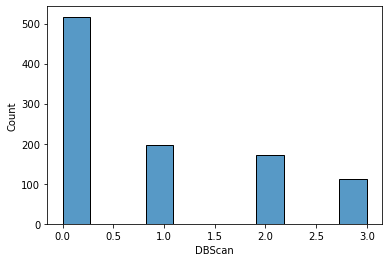

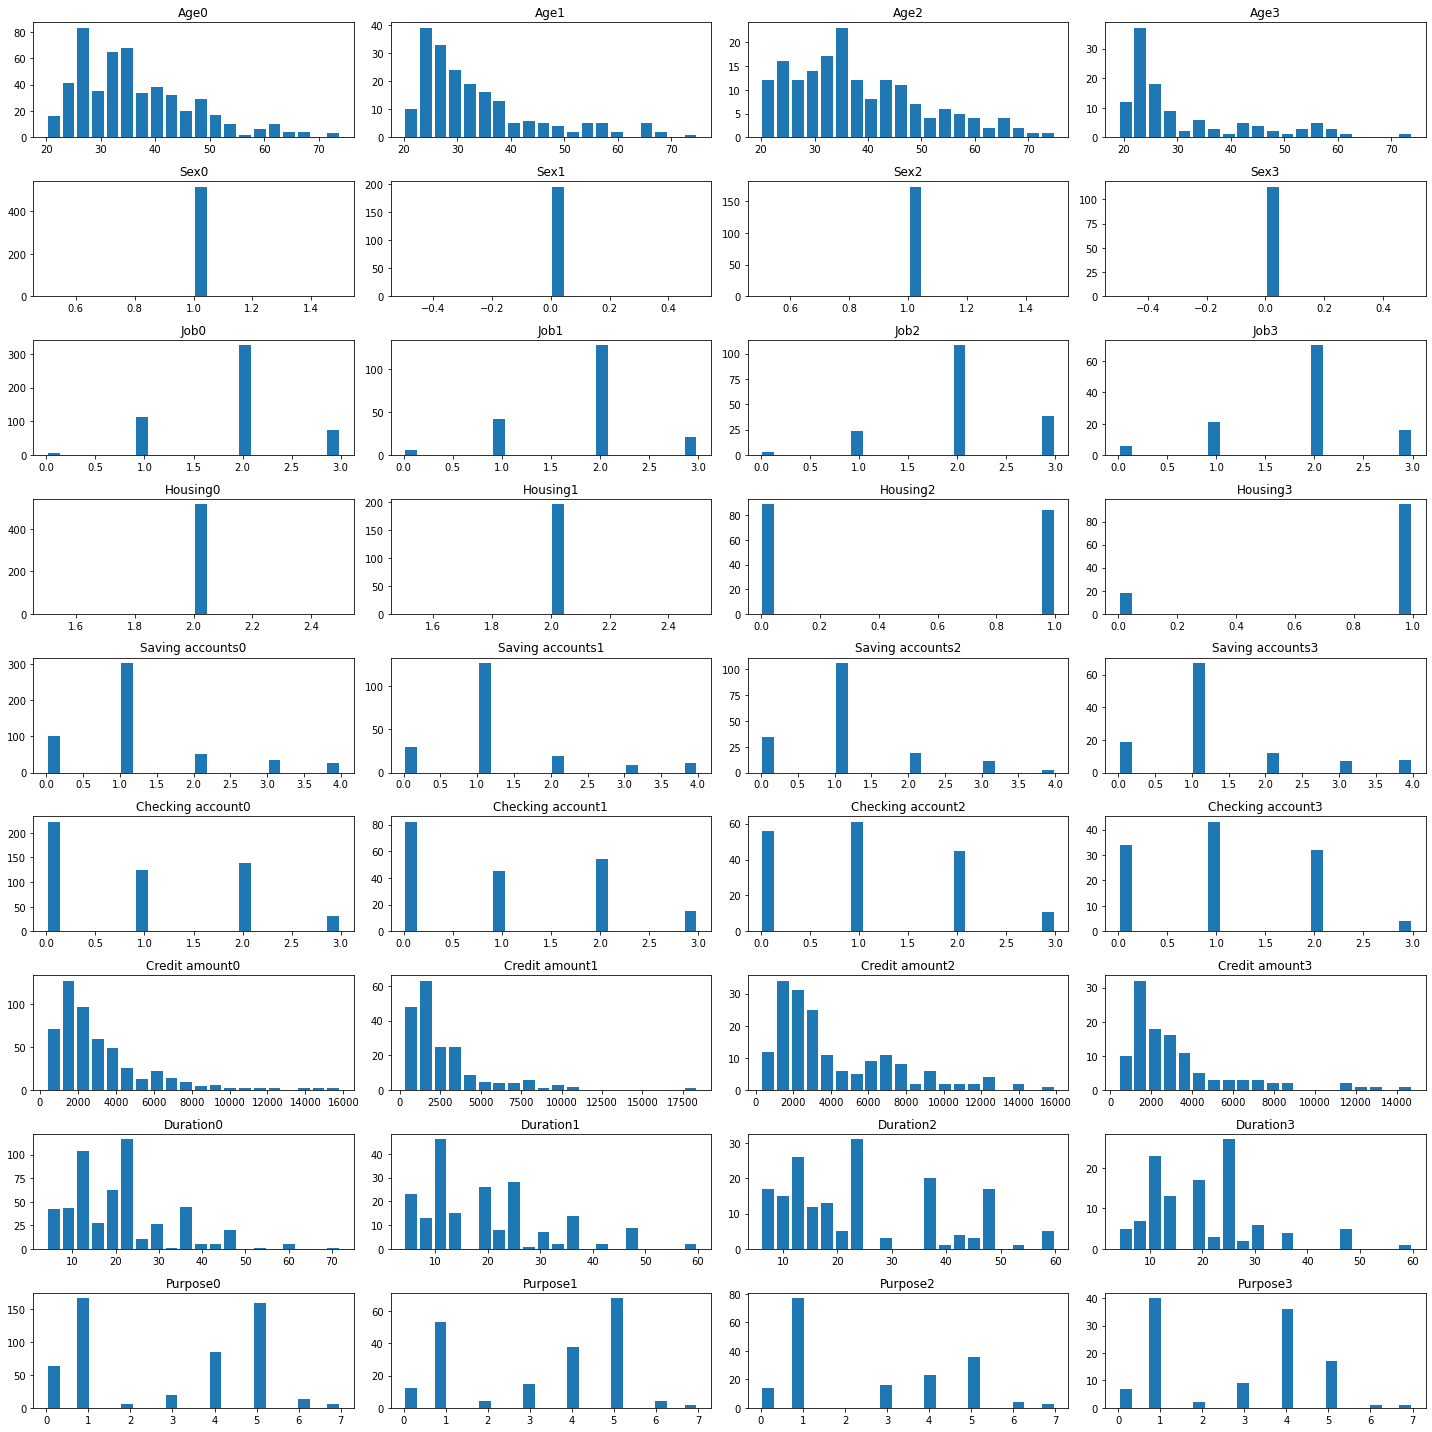

In [75]:
plot_values(labeled_data[labeled_data['DBScan'] != -1], 'DBScan', initial_columns)

Видно, что кластеры разделены по полу и наличию собственного жилья. Есть некоторые изменения в балансировке популярных категорий. Но никаких ярких признаков не видно.

У кластера 3 среди популярных категорий с большим отрывом лидируют машины. Популярность этой категрии у кластеров 3 и 4 можно объяснить отсутствием своего жилья, в которое можно было бы вкладывать деньги. Но у категрии 4 ситуация сглаживается тем, что она женская.

Женщины имеют тенденцию, при прочих равных, уделять большее внимание категории furniture/equipment. А люди, имеющие свое жилье активно берут кредиты на radio/TV, что тоже можно расценивать как обустраивание дома, но более дорогое.

Также группа 1 активнее берет кредиты на развитие бизнеса, что объяснимо для мужчин, имеющих собственное жилье.

## Вывод:
Кластеризация KMeans на 5 кластеров дает более яркие классы со своими особенностями. Но и использование DBScan на 4 кластера тоже возможно. В этом случае кластеры также имеют четкую структуру.